# Encoding

In [ ]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn                 as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
from datetime import datetime
import missingno as msng
import calendar
import time
from datetime import date, timedelta, datetime as dt
import re

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ejercicios ciencia de datos/dataset_SCL.csv')

<ipython-input-3-8324735990c6>:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Ejercicios ciencia de datos/dataset_SCL.csv')


#EDA

In [ ]:
df.describe(include='all')

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68206,68206,68206,68206,68206,68206,68205,68206,68206,68206,68206.000000,68206.000000,68206.000000,68206,68206,68206,68206,68206
unique,53252,750,1,64,30,62774,866,1,63,32,NaN,NaN,NaN,7,2,23,1,62
top,2017-07-28 13:30:00,174,SCEL,SCFA,LAN,2017-11-05 14:51:00,174,SCEL,SCFA,LAN,NaN,NaN,NaN,Viernes,N,Grupo LATAM,Santiago,Buenos Aires
freq,6,686,68206,5787,37611,5,649,68206,5786,20988,NaN,NaN,NaN,10292,36966,40892,68206,6335
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.714790,6.622585,2017.000029,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.782886,3.523321,0.005415,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2017.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,3.000000,2017.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,7.000000,2017.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,10.000000,2017.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


<Axes: >

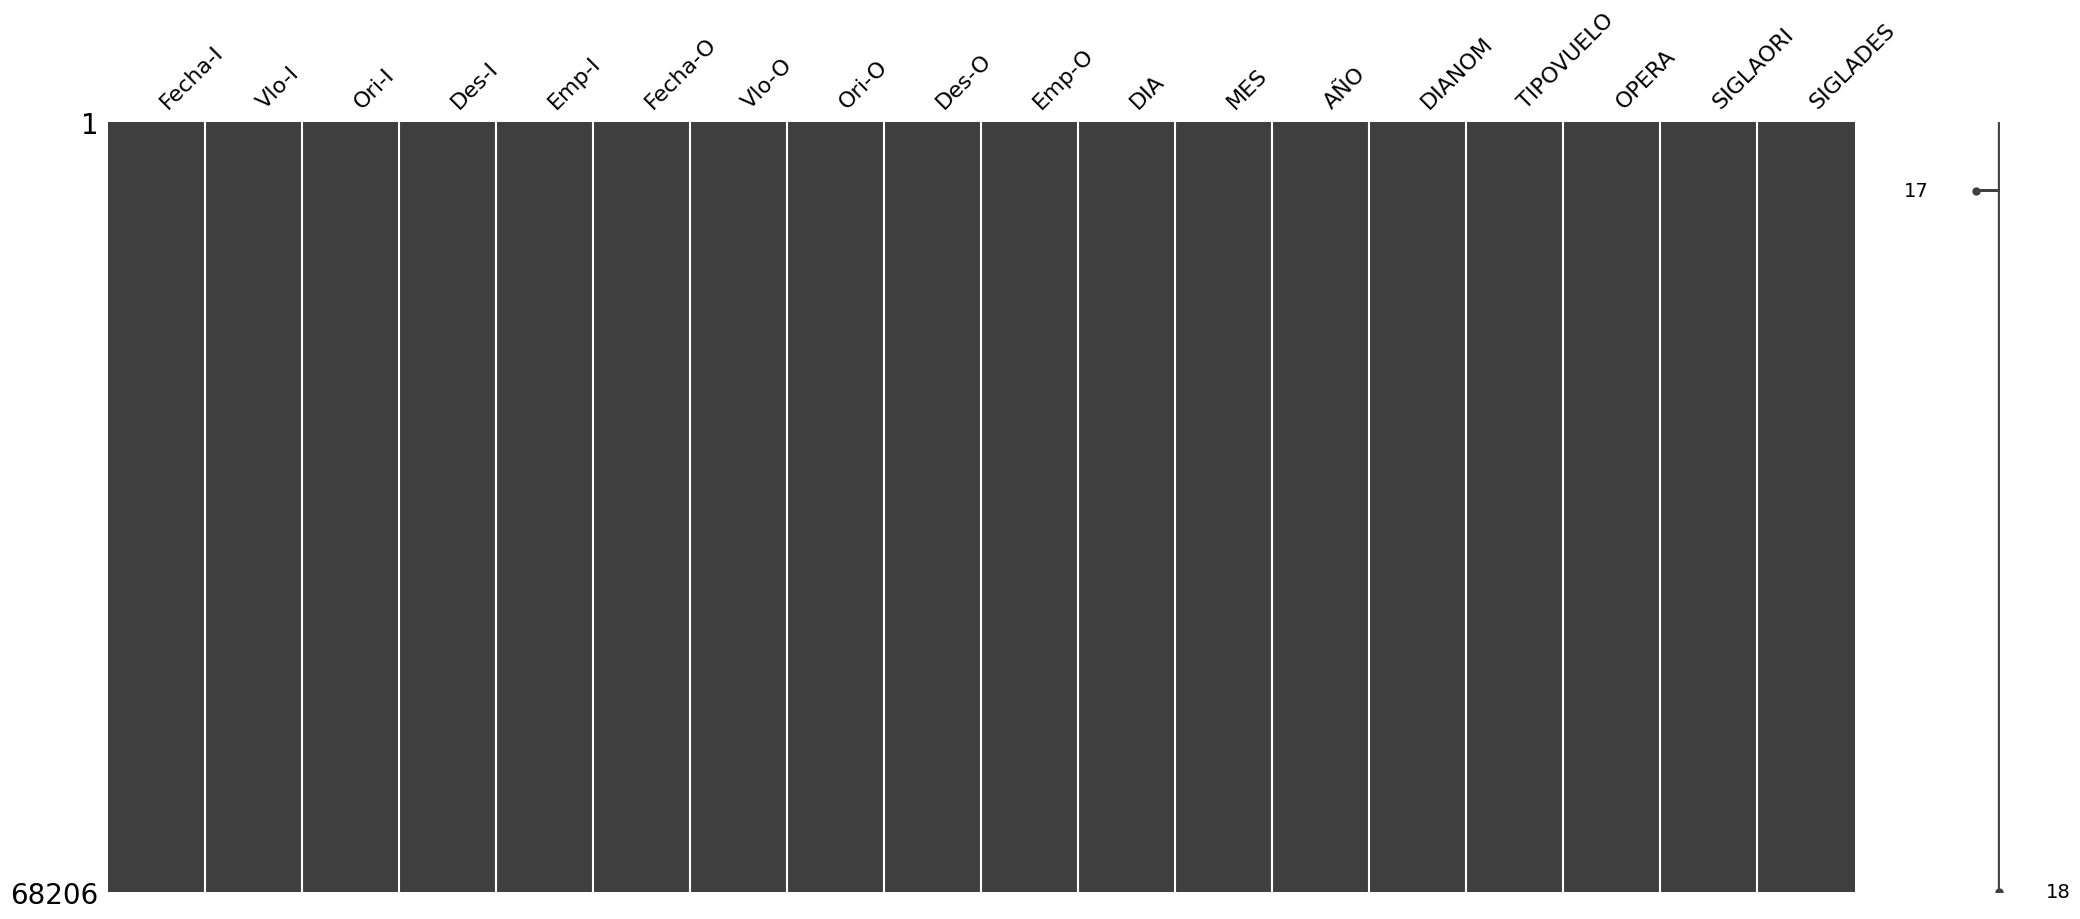

In [ ]:
msng.matrix(df)

In [ ]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


# Ingeniería de atributos

## Definir variables disponibles

### Dimensiones:



*   Fecha-I
*   Vlo-I
*   Ori-I
*   Des-I
*   Emp-I
*   Fecha-O
*   Vlo-O
*   Ori-O
*   Des-O
*   Emp-O
*   DIA
*   MES
*   AÑO
*   DIANOM
*   TIPOVUELO
*   OPERA
*   SIGLAORI
*   SIGLADES













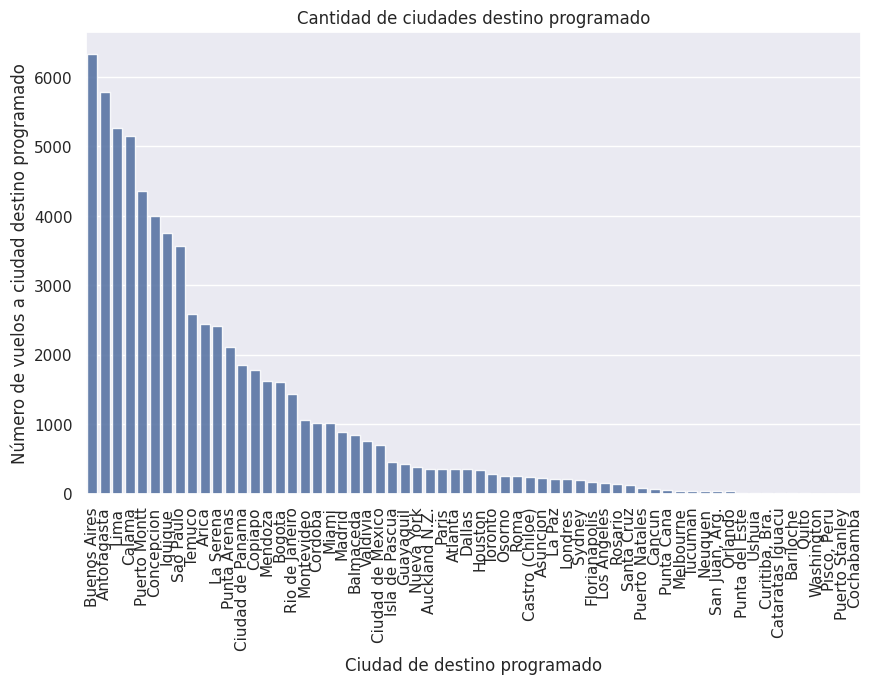

In [ ]:
ciudad_de_destino_programado = df['SIGLADES'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=ciudad_de_destino_programado.index, y=ciudad_de_destino_programado.values, alpha=0.9)
plt.title('Cantidad de ciudades destino programado')
plt.ylabel('Número de vuelos a ciudad destino programado', fontsize=12)
plt.xlabel('Ciudad de destino programado', fontsize=12)
plt.xticks(rotation=90)
plt.show()

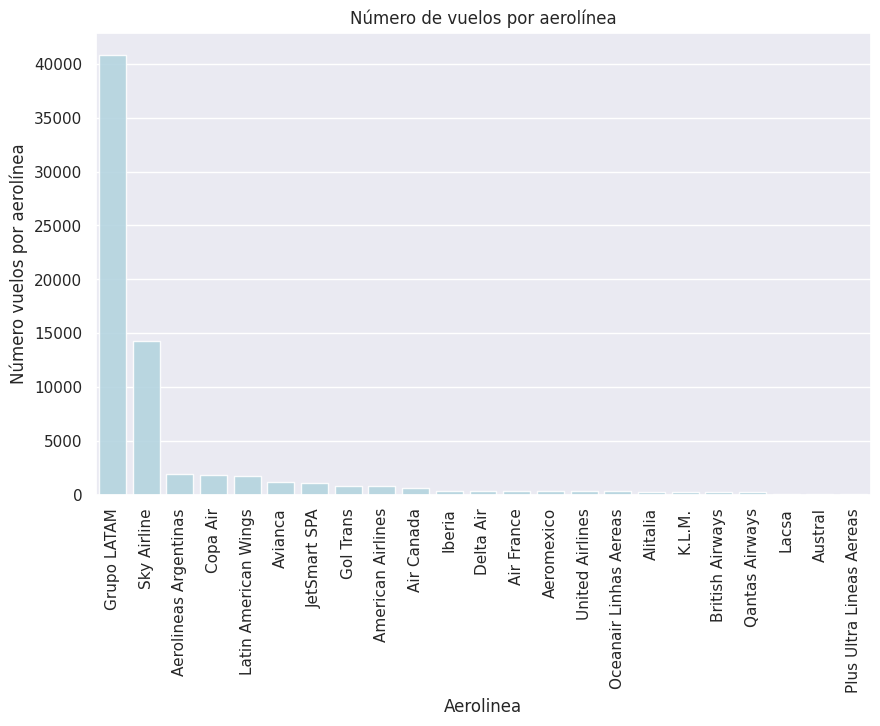

In [ ]:
aerolinea = df['OPERA'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=aerolinea.index, y=aerolinea.values, color = 'lightblue', alpha=0.9)
plt.title('Número de vuelos por aerolínea')
plt.ylabel('Número vuelos por aerolínea', fontsize=12)
plt.xlabel('Aerolinea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

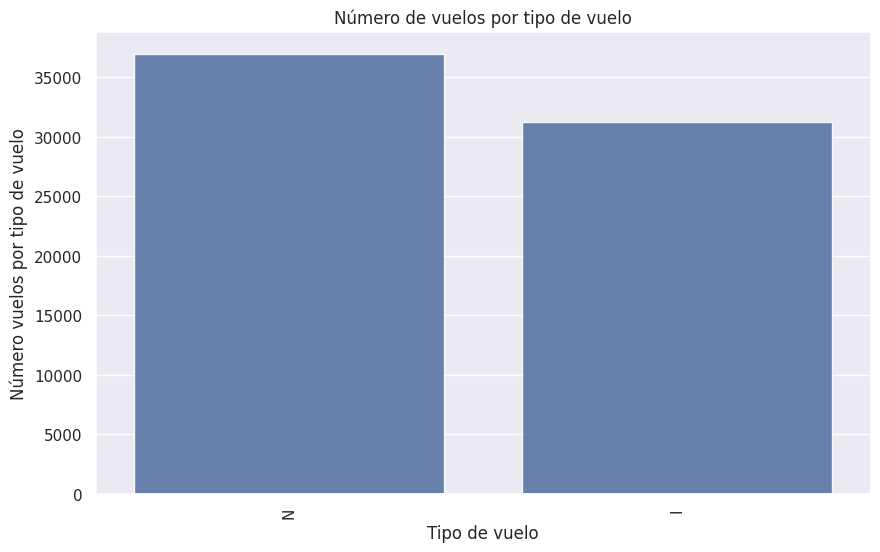

In [ ]:
tipo_de_vuelo = df['TIPOVUELO'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=tipo_de_vuelo.index, y=tipo_de_vuelo.values, alpha=0.9)
plt.title('Número de vuelos por tipo de vuelo')
plt.ylabel('Número vuelos por tipo de vuelo', fontsize=12)
plt.xlabel('Tipo de vuelo', fontsize=12)
plt.xticks(rotation=90)
plt.show()

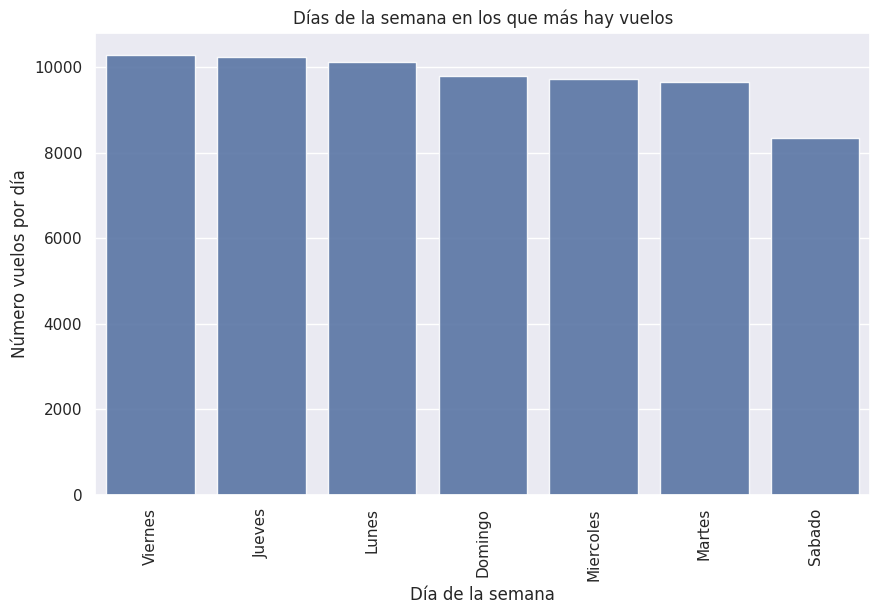

In [ ]:
dias_de_la_semana = df['DIANOM'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=dias_de_la_semana.index, y=dias_de_la_semana.values, alpha=0.9)
plt.title('Días de la semana en los que más hay vuelos')
plt.ylabel('Número vuelos por día', fontsize=12)
plt.xlabel('Día de la semana', fontsize=12)
plt.xticks(rotation=90)
plt.show()

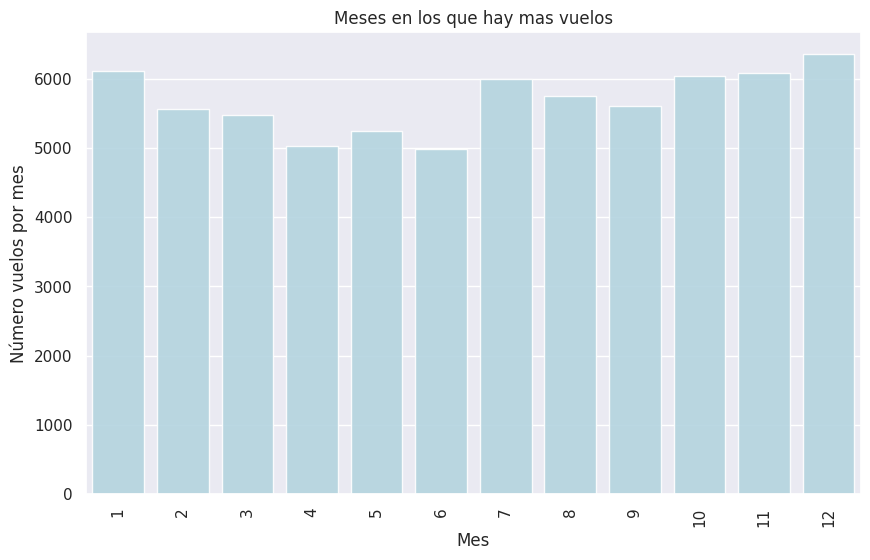

In [ ]:
meses_del_año = df['MES'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=meses_del_año.index, y=meses_del_año.values, color = 'lightblue', alpha=0.9)
plt.title('Meses en los que hay mas vuelos')
plt.ylabel('Número vuelos por mes', fontsize=12)
plt.xlabel('Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Transformación de datos y creación de variables sintéticas

## Definir temporada alta y temporada baja

In [ ]:
# Duplicar variables

df['Fecha-II'] = df['Fecha-I']

In [ ]:
# Transformar datos de la variable 'Fecha-I'

df['Fecha-II'] = pd.to_datetime(df['Fecha-II'])

df['Fecha-II']=df['Fecha-II'].dt.strftime('%Y-%m-%d')

In [ ]:
# Crear variable 'Temporada_alta

df["Temporada_alta"]=""

In [ ]:
# Clasificar temporada alta = 1; temporada baja = 0

Temporada_alta=[]
columna='Fecha-II'

def tiempos(row): # Función que va a sacar en 1 y 0 el rango de fechas deseada

    if row[columna] >= "2017-01-01" and row[columna] <= "2017-03-03":

        return 1

    elif row[columna] >="2017-07-15" and row[columna] <= "2017-07-31":

        return 1

    elif row[columna] >="2017-09-11" and row[columna] <= "2017-09-30":

        return 1

    elif row[columna] >="2017-12-15" and row[columna] <= "2017-12-31":

        return 1

    else:
        return 0

df['Temporada_alta']=df.apply(tiempos, axis=1)

In [ ]:
# Eliminar variable 'Fecha-II'

df = df.drop('Fecha-II', axis = 1)

## Diferencia de minutos

In [ ]:
# Transformar datos

if df['Fecha-O'].dtype != 'datetime64[ns]':
    df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

if df['Fecha-I'].dtype != 'datetime64[ns]':
    df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])

In [ ]:
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60 # Calcular diferencia de minutos

In [ ]:
df['dif_min'] = pd.to_numeric(df['dif_min'], errors='coerce')

## Atraso de más de 15 minutos

In [ ]:
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)

## Definir periodo mañana, tarde y noche

In [ ]:
# Crear variable 'horas' donde se extraen todos los datos de la columna 'FechaI'

df['horas'] = pd.to_datetime(df['Fecha-I']).dt.time

In [ ]:
# A la nueva columna se le aplica esta línea de código para evitar el error 'TypeError: '>=' not supported between instances of 'datetime.time' and 'str''
# el cual se da en el momento de aplicar la función 'mtn' en la columna 'df['horas']'

df['horas'] = df['horas'].apply(lambda x: x.strftime('%H:%M:%S'))

In [ ]:
# Clasificar periodos del día entre mañana, tarde y noche

periodo_dia=[]

def mtn (num):

    if num >= "05:00:00" and num <= "11:59:59":

            return "mañana"

    elif num >= "12:00:00" and num <= "18:59:59":

            return "tarde"

    else:
            return "noche"

nueva_lista=map(mtn, df['horas'])

for num in nueva_lista:
    periodo_dia.append(num)

In [ ]:
# Crear varible 'periodo_dia' donde va a almacenas la clasificación que se dió en la línea de código anterior

df['periodo_dia']=pd.DataFrame(periodo_dia, columns=['periodo_dia'])

In [ ]:
# Eliminar la variable 'horas'

df = df.drop('horas', axis = 1)

# Analizar datos con variables sintéticas creadas

In [ ]:
fecha_minima = df['Fecha-I'].min()
fecha_maxima = df['Fecha-I'].max()

print("Fecha mínima en la columna:", fecha_minima)
print("Fecha máxima en la columna:", fecha_maxima)

Fecha mínima en la columna: 2017-01-01 00:15:00
Fecha máxima en la columna: 2017-12-31 23:55:00


<ipython-input-28-eff7191dce6d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


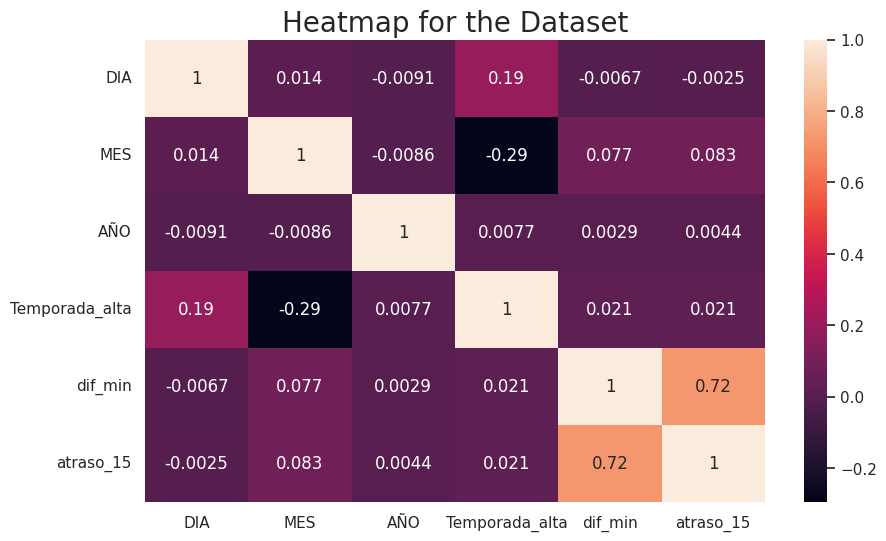

In [ ]:
#Hagamos un HeatMap del data set 'df'

plt.rcParams['figure.figsize'] = (10, 6)

sns.heatmap(df.corr(), annot = True)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

#### No se observa una correlación relevante entre las variables salvo la variable 'atraso_15' y 'dif_min' que es de la variable 'dif_min' que sale la variable 'atraso_15'

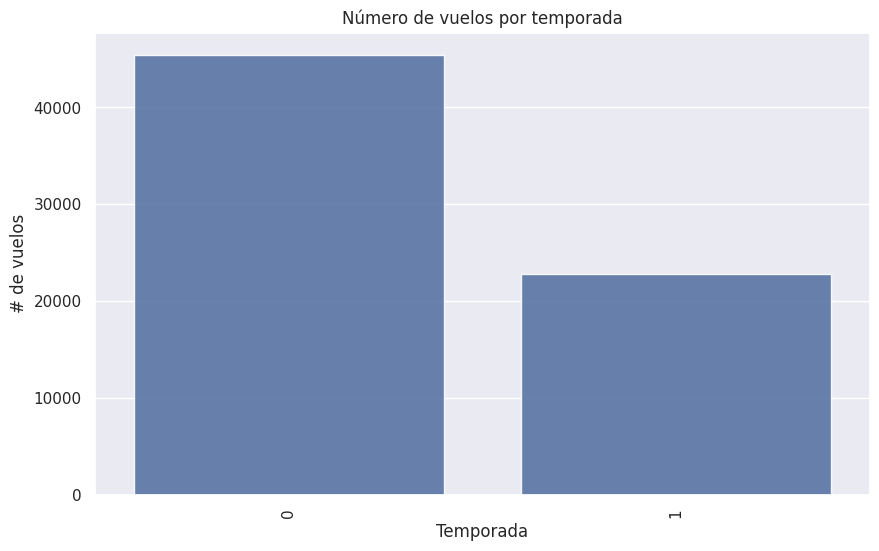

In [ ]:
dias_de_la_semana = df['Temporada_alta'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=dias_de_la_semana.index, y=dias_de_la_semana.values, alpha=0.9)
plt.title('Número de vuelos por temporada')
plt.ylabel('# de vuelos', fontsize=12)
plt.xlabel('Temporada', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Porcentaje de vuelos por temporada

# Calcular los conteos de cada valor en la columna 'Temporada_alta'
conteo_valores = df['Temporada_alta'].value_counts()

# Obtener el total de filas en la columna 'Temporada_alta'
total_filas = len(df)

# Calcular los porcentajes de ocurrencia de cada valor
porcentaje_1 = (conteo_valores[1] / total_filas) * 100
porcentaje_0 = (conteo_valores[0] / total_filas) * 100

print("Porcentaje de 1 en 'Temporada_alta':", porcentaje_1)
print("Porcentaje de 0 en 'Temporada_alta':", porcentaje_0)

Porcentaje de 1 en 'Temporada_alta': 33.37243057795502
Porcentaje de 0 en 'Temporada_alta': 66.62756942204499


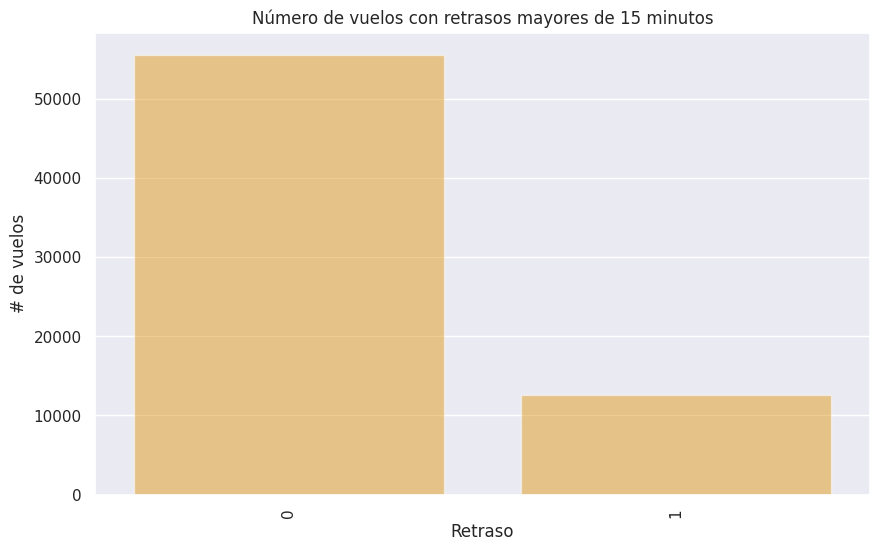

In [ ]:
dias_de_la_semana = df['atraso_15'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=dias_de_la_semana.index, y=dias_de_la_semana.values, alpha=0.5, color = 'orange')
plt.title('Número de vuelos con retrasos mayores de 15 minutos')
plt.ylabel('# de vuelos', fontsize=12)
plt.xlabel('Retraso', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Porcentaje de atrasos

# Calcular los conteos de cada valor en la columna 'atraso_15'
conteo_valores = df['atraso_15'].value_counts()

# Obtener el total de filas en la columna 'atraso_15'
total_filas = len(df)

# Calcular los porcentajes de ocurrencia de cada valor
porcentaje_1 = (conteo_valores[1] / total_filas) * 100
porcentaje_0 = (conteo_valores[0] / total_filas) * 100

print("Porcentaje de 1 en 'atraso_15':", porcentaje_1)
print("Porcentaje de 0 en 'atraso_15':", porcentaje_0)

Porcentaje de 1 en 'atraso_15': 18.493974137172682
Porcentaje de 0 en 'atraso_15': 81.50602586282731


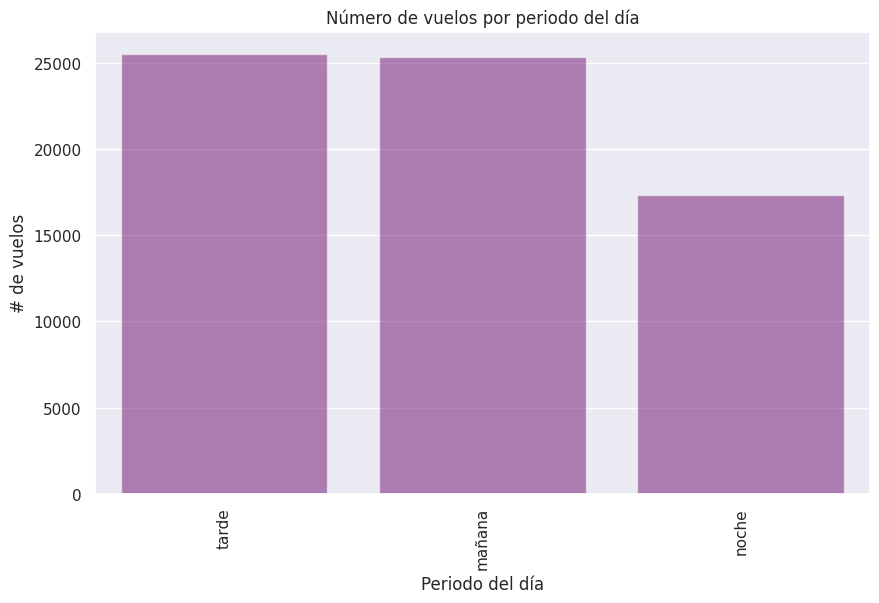

In [ ]:
dias_de_la_semana = df['periodo_dia'].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=dias_de_la_semana.index, y=dias_de_la_semana.values, alpha=0.5, color = 'purple')
plt.title('Número de vuelos por periodo del día')
plt.ylabel('# de vuelos', fontsize=12)
plt.xlabel('Periodo del día', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Porcentaje de atrasos

# Calcular los conteos de cada valor en la columna 'periodo_dia'
conteo_valores = df['periodo_dia'].value_counts()

# Obtener el total de filas en la columna 'periodo_dia'
total_filas = len(df)

# Calcular los porcentajes de ocurrencia de cada valor
porcentaje_mañana = (conteo_valores['mañana'] / total_filas) * 100
porcentaje_tarde = (conteo_valores['tarde'] / total_filas) * 100
porcentaje_noche = (conteo_valores['noche'] / total_filas) * 100

print("Porcentaje de mañana en 'periodo_dia':", porcentaje_mañana)
print("Porcentaje de tarde en 'periodo_dia':", porcentaje_tarde)
print("Porcentaje de noche en 'periodo_dia':", porcentaje_noche)

Porcentaje de mañana en 'periodo_dia': 37.1697504618362
Porcentaje de tarde en 'periodo_dia': 37.39553704952643
Porcentaje de noche en 'periodo_dia': 25.434712488637363


# Problema empresarial

## ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?


## Atraso por destino

In [ ]:
# Contar los valores de 'atraso_15' para cada categoría en 'SIGLADES'
tasa_atrasos = df.groupby('SIGLADES')['atraso_15'].value_counts().unstack(fill_value=0)

# Calcular el porcentaje de cada valor ('atraso_15') para cada categoría en 'SIGLADES'
porcentaje_atrasos = tasa_atrasos.div(tasa_atrasos.sum(axis=1), axis=0) * 100

# Mostrar el resultado
print(porcentaje_atrasos)

atraso_15               0          1
SIGLADES                            
Antofagasta     85.361217  14.638783
Arica           86.453202  13.546798
Asuncion        71.551724  28.448276
Atlanta         94.134078   5.865922
Auckland N.Z.   62.603878  37.396122
...                   ...        ...
Toronto         68.551237  31.448763
Tucuman         73.684211  26.315789
Ushuia          33.333333  66.666667
Valdivia        84.462151  15.537849
Washington     100.000000   0.000000

[62 rows x 2 columns]


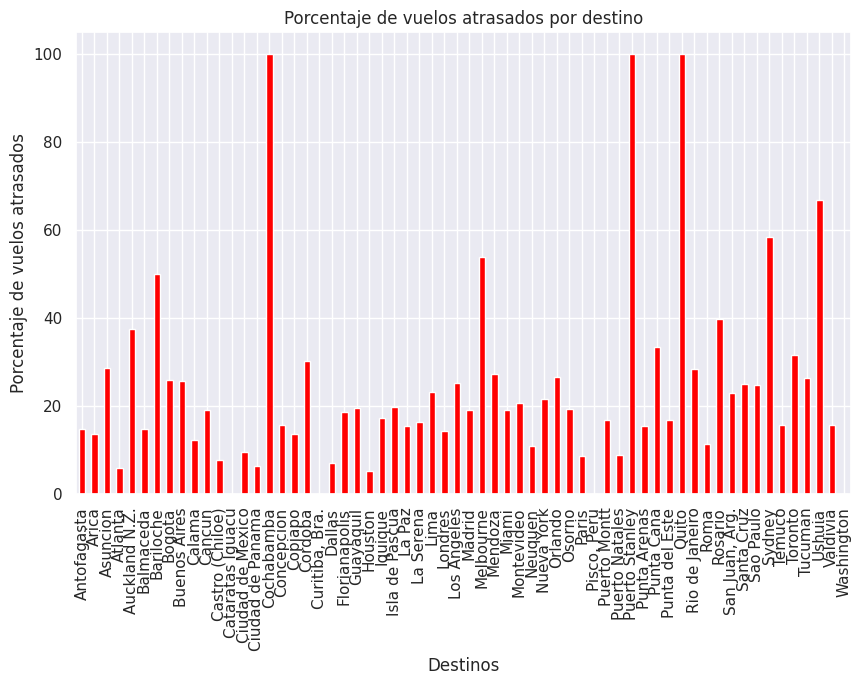

In [ ]:
porcentaje_atrasos[1].plot(kind='bar', color='red')
plt.title('Porcentaje de vuelos atrasados por destino')
plt.xlabel('Destinos')
plt.ylabel('Porcentaje de vuelos atrasados')
plt.xticks(rotation=90)
plt.show()

#### Los destinos que muestras una tasa de retraso del 100% es porque tienen poca frecuencia como destino desde el aeropuerto de Santiago de Chile , lo cual hace que si se presentan retrasos en los pocos vuelos de destino hace que l tasa de retraso sea muy alta.

## Atraso por aerolínea

In [ ]:
# Contar los valores de 'atraso_15' para cada categoría en 'OPERA'
tasa_atrasos_aerolinea = df.groupby('OPERA')['atraso_15'].value_counts().unstack(fill_value=0)

# Calcular el porcentaje de cada valor ('atraso_15') para cada categoría en 'OPERA'
porcentaje_atrasos_aerolinea = tasa_atrasos_aerolinea.div(tasa_atrasos_aerolinea.sum(axis=1), axis=0) * 100

# Mostrar el resultado
print(porcentaje_atrasos_aerolinea)

atraso_15                         0          1
OPERA                                         
Aerolineas Argentinas     75.987686  24.012314
Aeromexico                97.150997   2.849003
Air Canada                54.336283  45.663717
Air France                91.620112   8.379888
Alitalia                  88.803089  11.196911
American Airlines         93.262880   6.737120
Austral                   79.729730  20.270270
Avianca                   73.437500  26.562500
British Airways           85.853659  14.146341
Copa Air                  93.729730   6.270270
Delta Air                 94.134078   5.865922
Gol Trans                 64.392060  35.607940
Grupo LATAM               82.133425  17.866575
Iberia                    90.055249   9.944751
JetSmart SPA              82.100457  17.899543
K.L.M.                    91.633466   8.366534
Lacsa                     88.043478  11.956522
Latin American Wings      59.318996  40.681004
Oceanair Linhas Aereas    84.587814  15.412186
Plus Ultra Li

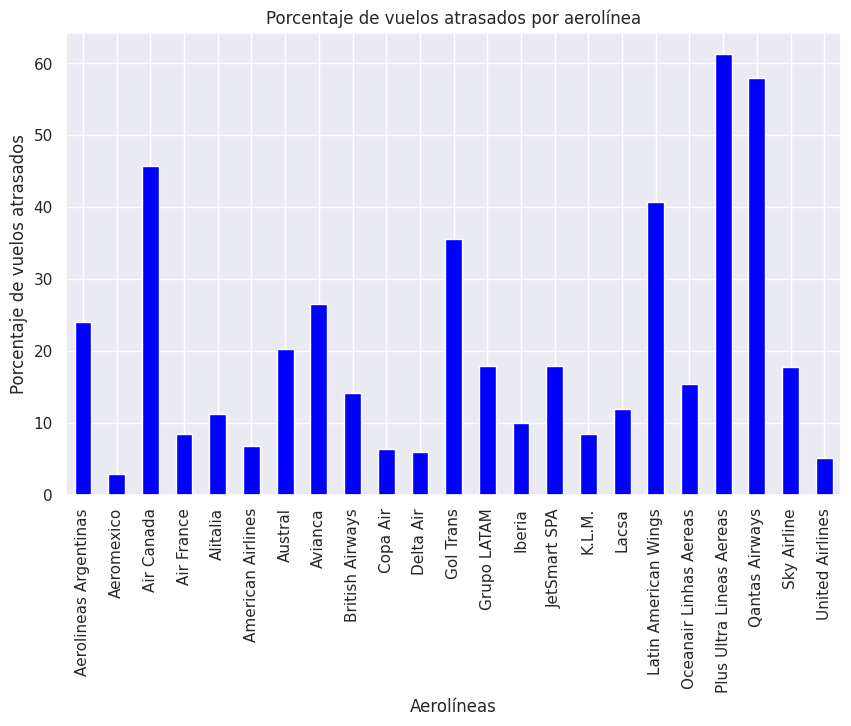

In [ ]:
porcentaje_atrasos_aerolinea[1].plot(kind='bar', color='blue')
plt.title('Porcentaje de vuelos atrasados por aerolínea')
plt.xlabel('Aerolíneas')
plt.ylabel('Porcentaje de vuelos atrasados')
plt.xticks(rotation=90)
plt.show()

#### Las aerolíneas que muestras una tasa de retraso muy alta es porque tienen poca frecuencia como aerolínea desde el aeropuerto de Santiago de Chile , lo cual hace que si se presentan retrasos en dichas aeorolíneas la tasa de retraso se vuelve muy alta.

## Atraso por mes de año

In [ ]:
# Contar los valores de 'atraso_15' para cada categoría en 'MES'
tasa_atrasos_mes = df.groupby('MES')['atraso_15'].value_counts().unstack(fill_value=0)

# Calcular el porcentaje de cada valor ('atraso_15') para cada categoría en 'MES'
porcentaje_atrasos_mes = tasa_atrasos_mes.div(tasa_atrasos_mes.sum(axis=1), axis=0) * 100

# Mostrar el resultado
print(porcentaje_atrasos_mes)

atraso_15          0          1
MES                            
1          83.988212  16.011788
2          84.840856  15.159144
3          88.489602  11.510398
4          88.346614  11.653386
5          84.217557  15.782443
6          82.895001  17.104999
7          70.660881  29.339119
8          82.660167  17.339833
9          82.762923  17.237077
10         77.403846  22.596154
11         80.279605  19.720395
12         74.590938  25.409062


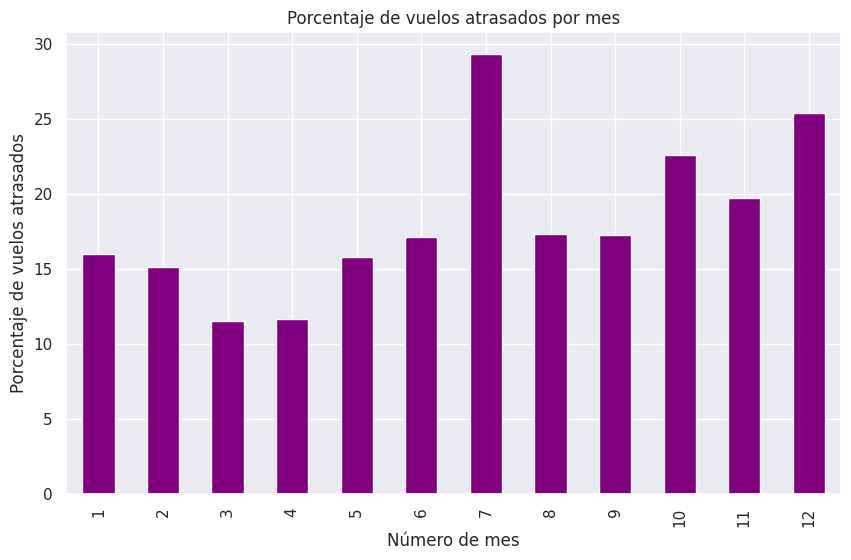

In [ ]:
porcentaje_atrasos_mes[1].plot(kind='bar', color='purple')
plt.title('Porcentaje de vuelos atrasados por mes')
plt.xlabel('Número de mes')
plt.ylabel('Porcentaje de vuelos atrasados')
plt.xticks(rotation=90)
plt.show()

#### Los meses que más presentan retrasos son Julio por ser temporada de invierno y Diciembre por haber un aumento en el número de vuelos respecto al resto de meses

## Atraso por día de la semana

In [ ]:
# Contar los valores de 'atraso_15' para cada categoría en 'DIANOM'
tasa_atrasos_dia = df.groupby('DIANOM')['atraso_15'].value_counts().unstack(fill_value=0)

# Calcular el porcentaje de cada valor ('atraso_15') para cada categoría en 'DIANOM'
porcentaje_atrasos_dia = tasa_atrasos_dia.div(tasa_atrasos_dia.sum(axis=1), axis=0) * 100

# Mostrar el resultado
print(porcentaje_atrasos_dia)

atraso_15          0          1
DIANOM                         
Domingo    83.891384  16.108616
Jueves     80.050727  19.949273
Lunes      79.784819  20.215181
Martes     83.088387  16.911613
Miercoles  82.915038  17.084962
Sabado     83.680556  16.319444
Viernes    77.798290  22.201710


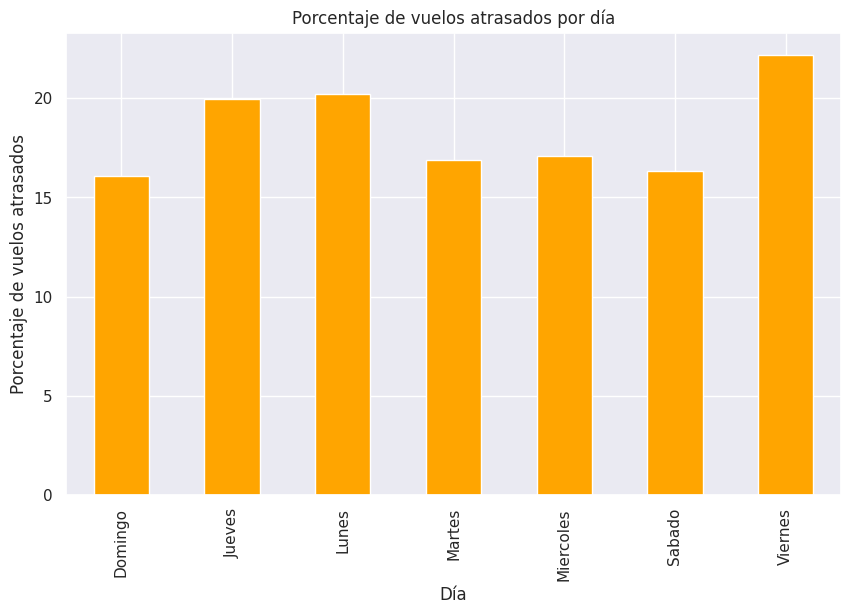

In [ ]:
porcentaje_atrasos_dia[1].plot(kind='bar', color='orange')
plt.title('Porcentaje de vuelos atrasados por día')
plt.xlabel('Día')
plt.ylabel('Porcentaje de vuelos atrasados')
plt.xticks(rotation=90)
plt.show()

#### Los días que presentan más atrasos es porque son los días en que más vuelos se registran

## Atraso por temporada

In [ ]:
# Contar los valores de 'atraso_15' para cada categoría en 'Temporada_alta'
tasa_atrasos_temporada = df.groupby('Temporada_alta')['atraso_15'].value_counts().unstack(fill_value=0)

# Calcular el porcentaje de cada valor ('atraso_15') para cada categoría en 'Temporada_alta'
porcentaje_atrasos_temporada = tasa_atrasos_temporada.div(tasa_atrasos_temporada.sum(axis=1), axis=0) * 100

# Mostrar el resultado
print(porcentaje_atrasos_temporada)

atraso_15               0          1
Temporada_alta                      
0               82.079042  17.920958
1               80.362007  19.637993


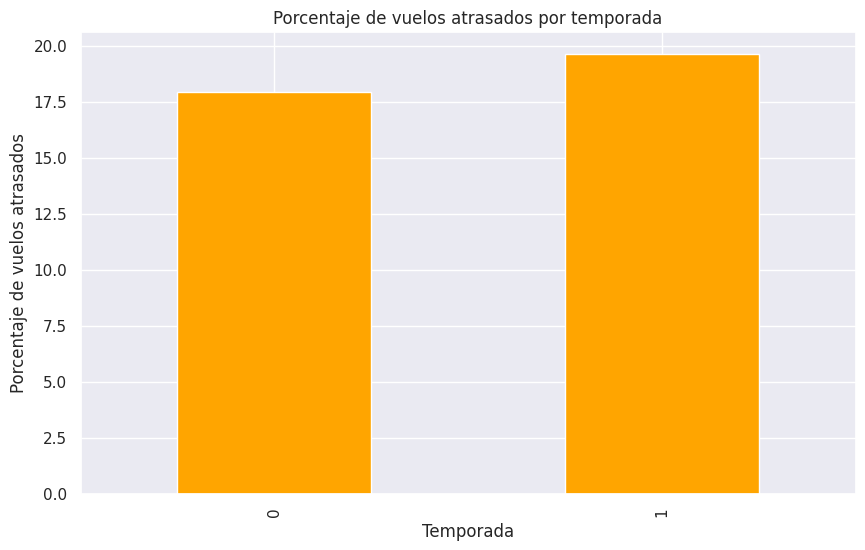

In [ ]:
porcentaje_atrasos_temporada[1].plot(kind='bar', color='orange')
plt.title('Porcentaje de vuelos atrasados por temporada')
plt.xlabel('Temporada')
plt.ylabel('Porcentaje de vuelos atrasados')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Contar los valores de 'atraso_15' para cada categoría en 'TIPOVUELO'
tasa_atrasos_tipo_vuelo = df.groupby('TIPOVUELO')['atraso_15'].value_counts().unstack(fill_value=0)

# Calcular el porcentaje de cada valor ('atraso_15') para cada categoría en 'TIPOVUELO'
porcentaje_atrasos_tipo_vuelo = tasa_atrasos_tipo_vuelo.div(tasa_atrasos_tipo_vuelo.sum(axis=1), axis=0) * 100

# Mostrar el resultado
print(porcentaje_atrasos_tipo_vuelo)

atraso_15          0          1
TIPOVUELO                      
I          77.439181  22.560819
N          84.942921  15.057079


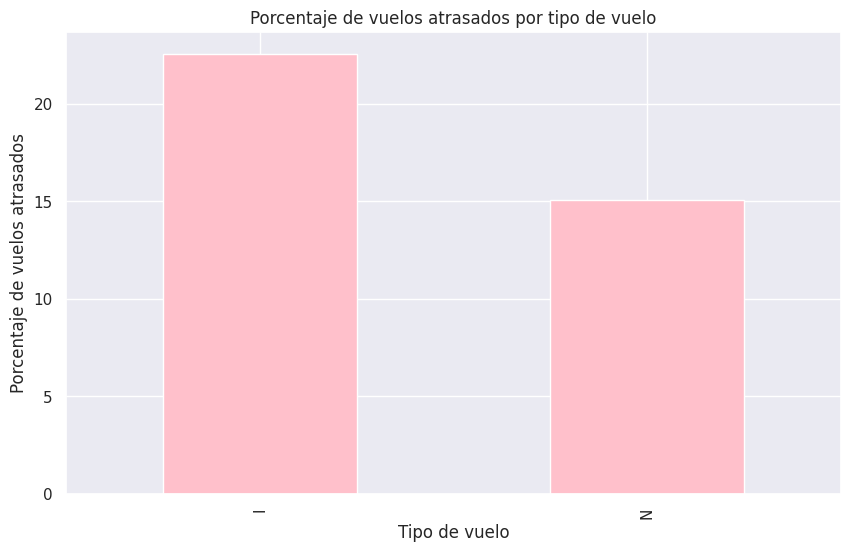

In [ ]:
porcentaje_atrasos_tipo_vuelo[1].plot(kind='bar', color='pink')
plt.title('Porcentaje de vuelos atrasados por tipo de vuelo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Porcentaje de vuelos atrasados')
plt.xticks(rotation=90)
plt.show()

# Creación de variables sintéticas

# EDA dataset clima

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Ejercicios ciencia de datos/data_weather.csv')

In [ ]:
df_1.describe(include='all')

,fecha_i,fecha_o,siglaori,siglades,lat_santiago,lon_santiago,elevacion_santiago,lat_destino,lon_destino,elevacion_destino,...,tavg_santiago,tmin_santiago,tmax_santiago,prcp_santiago,snow_santiago,wdir_santiago,wspd_santiago,wpgt_santiago,pres_santiago,tsun_santiago
count,63007,63007,63007,63007,6.300700e+04,63007.000000,6.300700e+04,63007.000000,63007.000000,63007.000000,...,63007.000000,61960.000000,60906.000000,58891.000000,0.0,2990.000000,59074.000000,0.0,52443.000000,0.0
unique,50025,58334,1,60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,26/03/2017 18:00,19/05/2017 07:01,Santiago,Buenos Aires,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,5,63007,5679,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,-3.339300e+01,-70.785797,4.739640e+02,-21.919809,-66.157752,399.942412,...,15.746169,8.731761,24.599122,0.478279,NaN,176.243813,10.369061,NaN,1016.195805,NaN
std,NaN,NaN,NaN,NaN,1.421097e-14,0.000000,1.705316e-13,20.814627,24.769017,748.068417,...,5.793088,4.988452,6.815233,2.102000,NaN,7.371408,3.452598,NaN,3.276040,NaN
min,NaN,NaN,NaN,NaN,-3.339300e+01,-70.785797,4.739640e+02,-54.843300,-118.407997,2.438400,...,3.500000,-3.800000,9.000000,0.000000,NaN,168.000000,3.900000,NaN,1009.900000,NaN
25%,NaN,NaN,NaN,NaN,-3.339300e+01,-70.785797,4.739640e+02,-34.822200,-73.094002,34.442399,...,10.300000,4.800000,18.500000,0.000000,NaN,171.000000,7.400000,NaN,1013.600000,NaN
50%,NaN,NaN,NaN,NaN,-3.339300e+01,-70.785797,4.739640e+02,-23.444501,-70.445099,89.611197,...,15.800000,9.000000,25.800000,0.000000,NaN,175.000000,10.500000,NaN,1015.800000,NaN
75%,NaN,NaN,NaN,NaN,-3.339300e+01,-70.785797,4.739640e+02,-18.348499,-68.792900,204.215993,...,20.900000,12.600000,30.400000,0.000000,NaN,178.000000,13.300000,NaN,1018.300000,NaN


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63007 entries, 0 to 63006
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fecha_i             63007 non-null  object 
 1   fecha_o             63007 non-null  object 
 2   siglaori            63007 non-null  object 
 3   siglades            63007 non-null  object 
 4   lat_santiago        63007 non-null  float64
 5   lon_santiago        63007 non-null  float64
 6   elevacion_santiago  63007 non-null  float64
 7   lat_destino         63007 non-null  float64
 8   lon_destino         63007 non-null  float64
 9   elevacion_destino   63007 non-null  float64
 10  tavg_dest           53548 non-null  float64
 11  tmin_dest           52257 non-null  float64
 12  tmax_dest           51362 non-null  float64
 13  prcp_dest           36036 non-null  float64
 14  snow_dest           1691 non-null   float64
 15  wdir_dest           28173 non-null  float64
 16  wspd

In [ ]:
df_1.describe()

,lat_santiago,lon_santiago,elevacion_santiago,lat_destino,lon_destino,elevacion_destino,tavg_dest,tmin_dest,tmax_dest,prcp_dest,...,tavg_santiago,tmin_santiago,tmax_santiago,prcp_santiago,snow_santiago,wdir_santiago,wspd_santiago,wpgt_santiago,pres_santiago,tsun_santiago
count,6.300700e+04,63007.000000,6.300700e+04,63007.000000,63007.000000,63007.000000,53548.000000,52257.000000,51362.000000,36036.000000,...,63007.000000,61960.000000,60906.000000,58891.000000,0.0,2990.000000,59074.000000,0.0,52443.000000,0.0
mean,-3.339300e+01,-70.785797,4.739640e+02,-21.919809,-66.157752,399.942412,17.185198,13.457543,21.996028,2.329898,...,15.746169,8.731761,24.599122,0.478279,NaN,176.243813,10.369061,NaN,1016.195805,NaN
std,1.421097e-14,0.000000,1.705316e-13,20.814627,24.769017,748.068417,6.020129,6.440862,6.343105,7.820840,...,5.793088,4.988452,6.815233,2.102000,NaN,7.371408,3.452598,NaN,3.276040,NaN
min,-3.339300e+01,-70.785797,4.739640e+02,-54.843300,-118.407997,2.438400,-10.100000,-20.800000,-7.300000,0.000000,...,3.500000,-3.800000,9.000000,0.000000,NaN,168.000000,3.900000,NaN,1009.900000,NaN
25%,-3.339300e+01,-70.785797,4.739640e+02,-34.822200,-73.094002,34.442399,13.400000,9.000000,18.000000,0.000000,...,10.300000,4.800000,18.500000,0.000000,NaN,171.000000,7.400000,NaN,1013.600000,NaN
50%,-3.339300e+01,-70.785797,4.739640e+02,-23.444501,-70.445099,89.611197,17.000000,14.000000,21.400000,0.000000,...,15.800000,9.000000,25.800000,0.000000,NaN,175.000000,10.500000,NaN,1015.800000,NaN
75%,-3.339300e+01,-70.785797,4.739640e+02,-18.348499,-68.792900,204.215993,21.600000,18.000000,26.600000,0.300000,...,20.900000,12.600000,30.400000,0.000000,NaN,178.000000,13.300000,NaN,1018.300000,NaN
max,-3.339300e+01,-70.785797,4.739640e+02,51.470600,174.792007,4070.603870,32.800000,28.900000,42.900000,163.600000,...,27.500000,19.500000,37.700000,20.800000,NaN,198.000000,17.800000,NaN,1028.500000,NaN


<Axes: >

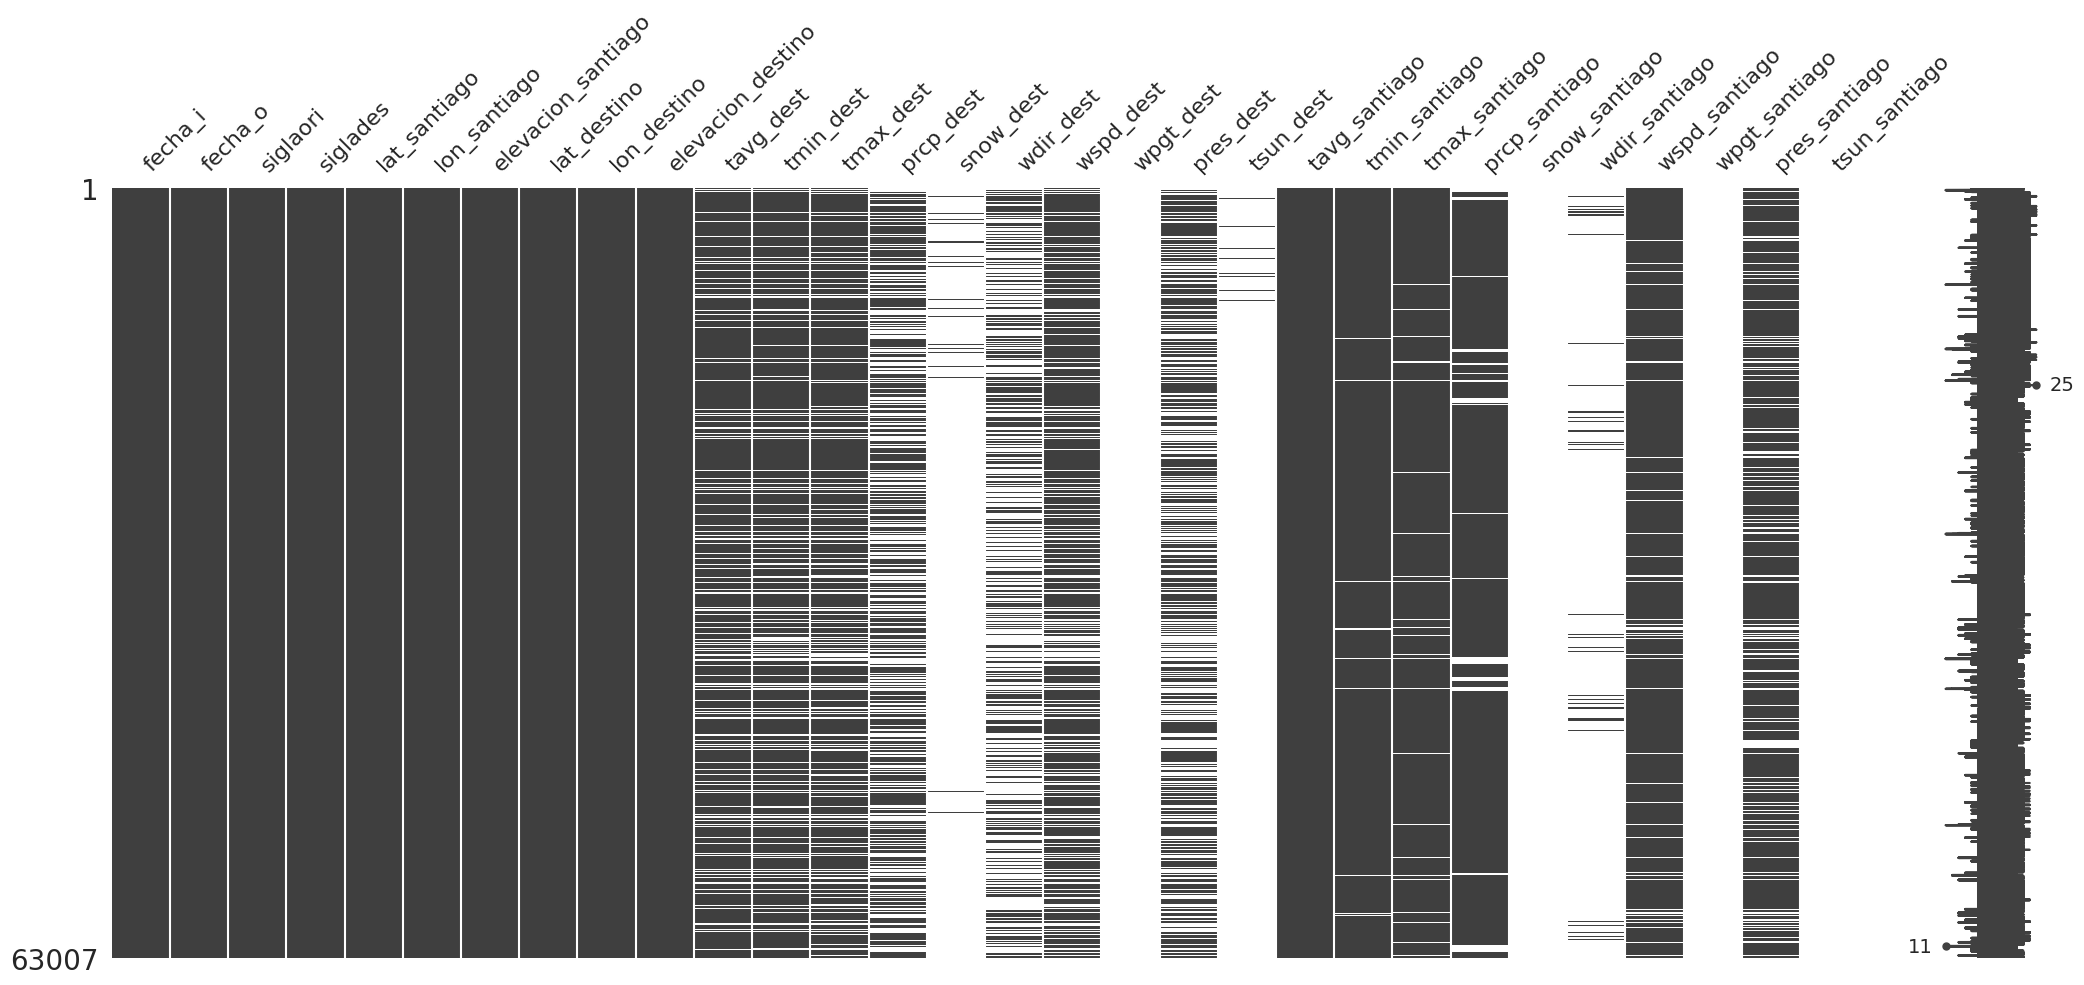

In [ ]:
msng.matrix(df_1)

# Ingeniería de atributos df_1

## Definir variables disponibles

### Dimensiones:



*   fecha-I
*   fecha-O
*   siglaori
*   siglades
*   lat_santiago
*   lon_santiago
*   elevacion_santiago
*   lat_destino
*   lon_destino
*   elevacion_destino

### Medidas:

*   tavg_dest          
*   tmin_dest
*   tmax_dest
*   snow_dest           
*   wdir_dest           
*   wspd_dest           
*   wpgt_dest           
*   pres_dest           
*   tsun_dest           
*   tavg_santiago       
*   tmin_santiago       
*   tmax_santiago       
*   prcp_santiago       
*   snow_santiago       
*   wdir_santiago       
*   wspd_santiago       
*   wpgt_santiago       
*   pres_santiago       
*   tsun_santiago       

In [ ]:
# Contar % de datos nulos

porcentaje_nulos = df_1.isnull().mean() * 100

# Mostrar el resultado
print(porcentaje_nulos)

fecha_i                 0.000000
fecha_o                 0.000000
siglaori                0.000000
siglades                0.000000
lat_santiago            0.000000
lon_santiago            0.000000
elevacion_santiago      0.000000
lat_destino             0.000000
lon_destino             0.000000
elevacion_destino       0.000000
tavg_dest              15.012618
tmin_dest              17.061596
tmax_dest              18.482073
prcp_dest              42.806355
snow_dest              97.316171
wdir_dest              55.285921
wspd_dest              23.479931
wpgt_dest             100.000000
pres_dest              41.841383
tsun_dest              99.063596
tavg_santiago           0.000000
tmin_santiago           1.661720
tmax_santiago           3.334550
prcp_santiago           6.532607
snow_santiago         100.000000
wdir_santiago          95.254496
wspd_santiago           6.242164
wpgt_santiago         100.000000
pres_santiago          16.766391
tsun_santiago         100.000000
dtype: flo

#### Se descartan las columnas “prcp_dest”, “snow_dest”, “wdir_dest”, “wspd_dest”, “wpgt_dest”, “pres_dest”, “tsun_dest”, “snow_santiago”, “wdir_santiago”, “wpgt_santiago” y “tsun_santiago” porque tiene un porcentaje de valores nulos superior al 20% para ser tratados con el método de imputación de datos nulos.

In [ ]:
# Lista de columnas a eliminar
columnas_a_eliminar = ["prcp_dest", "snow_dest", "wdir_dest", "wspd_dest",
                       "wpgt_dest", "pres_dest", "tsun_dest", "snow_santiago",
                       "wdir_santiago", "wpgt_santiago", "tsun_santiago"]

# Eliminar las columnas del DataFrame df_1
df_1 = df_1.drop(columnas_a_eliminar, axis=1)

In [ ]:
# Tranformar el tipo de datos en las columnas "fecha_i" y "fecha_o"

df_1['fecha_i'] = pd.to_datetime(df_1['fecha_i'])

df_1['fecha_o'] = pd.to_datetime(df_1['fecha_o'])

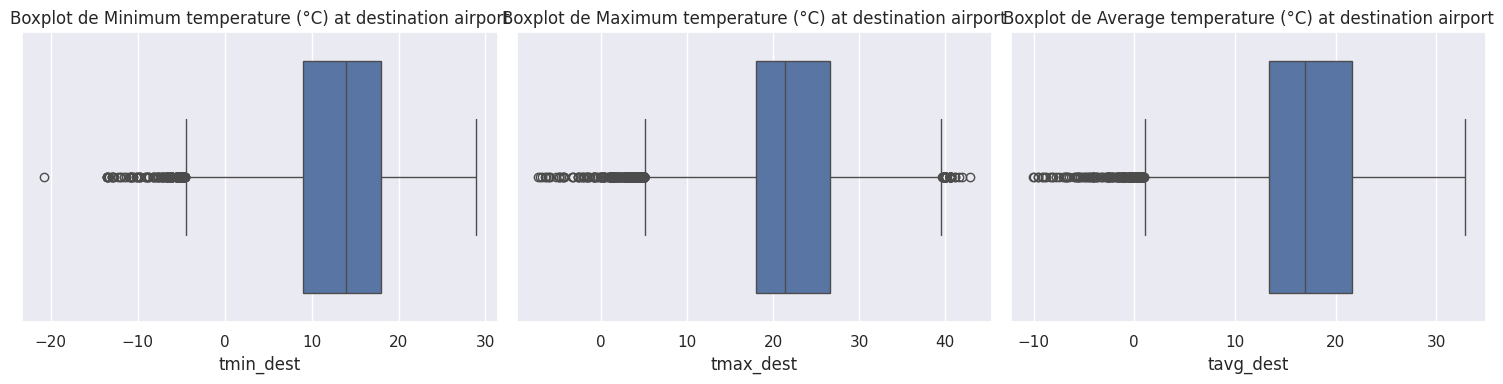

In [ ]:
# Crear subplots para mostrar varios boxplots juntos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Boxplot para la columna tmin_dest
sns.boxplot(ax=axes[0], x="tmin_dest", data=df_1)
axes[0].set_xlabel('tmin_dest')
axes[0].set_title('Boxplot de Minimum temperature (°C) at destination airport')

# Boxplot para la columna tmax_dest
sns.boxplot(ax=axes[1], x="tmax_dest", data=df_1)
axes[1].set_xlabel('tmax_dest')
axes[1].set_title('Boxplot de Maximum temperature (°C) at destination airport')

# Boxplot para la columna tavg_dest
sns.boxplot(ax=axes[2], x="tavg_dest", data=df_1)
axes[2].set_xlabel('tavg_dest')
axes[2].set_title('Boxplot de Average temperature (°C) at destination airport')

# Ajustar el espacio entre los subplots
plt.tight_layout()

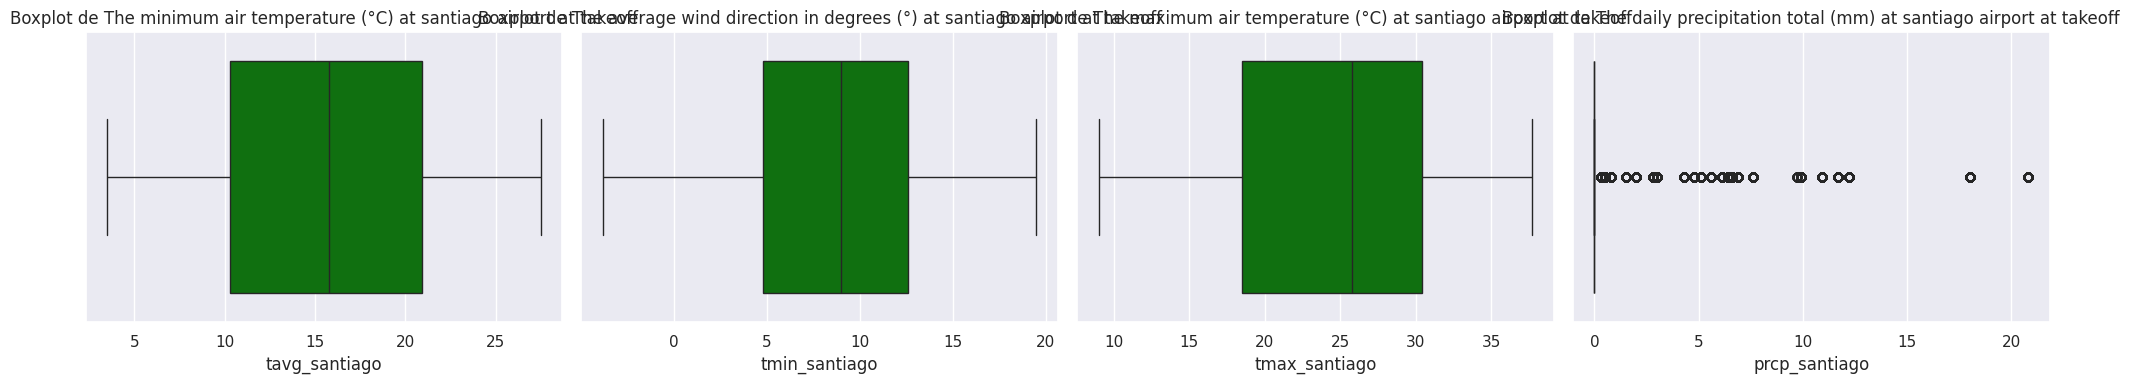

In [ ]:
# Crear subplots para mostrar varios boxplots juntos
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Boxplot para la columna tavg_santiago
sns.boxplot(ax=axes[0], x="tavg_santiago", data=df_1, color='green')
axes[0].set_xlabel('tavg_santiago')
axes[0].set_title('Boxplot de The minimum air temperature (°C) at santiago airport at takeoff')

# Boxplot para la columna tmin_santiago
sns.boxplot(ax=axes[1], x="tmin_santiago", data=df_1, color='green')
axes[1].set_xlabel('tmin_santiago')
axes[1].set_title('Boxplot de The average wind direction in degrees (°) at santiago airport at takeoff')

# Boxplot para la columna tmax_santiago
sns.boxplot(ax=axes[2], x="tmax_santiago", data=df_1, color='green')
axes[2].set_xlabel('tmax_santiago')
axes[2].set_title('Boxplot de The maximum air temperature (°C) at santiago airport at takeoff')

# Boxplot para la columna prcp_santiago
sns.boxplot(ax=axes[3], x="prcp_santiago", data=df_1, color='green')
axes[3].set_xlabel('prcp_santiago')
axes[3].set_title('Boxplot de The daily precipitation total (mm) at santiago airport at takeoff')

# Ajustar el espacio entre los subplots
plt.tight_layout()

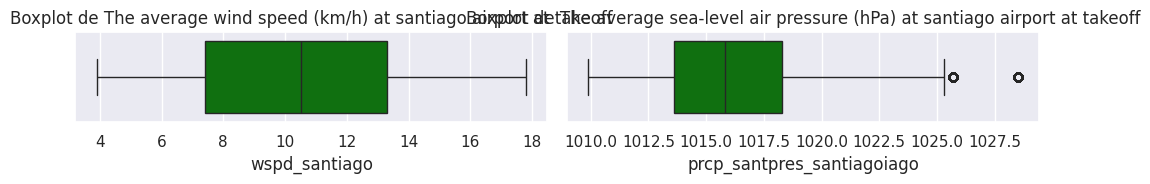

In [ ]:
# Crear subplots para mostrar varios boxplots juntos
fig, axes = plt.subplots(1, 2, figsize=(10, 2))

# Boxplot para la columna wspd_santiago
sns.boxplot(ax=axes[0], x="wspd_santiago", data=df_1, color='green')
axes[0].set_xlabel('wspd_santiago')
axes[0].set_title('Boxplot de The average wind speed (km/h) at santiago airport at takeoff')

# Boxplot para la columna pres_santiago
sns.boxplot(ax=axes[1], x="pres_santiago", data=df_1, color='green')
axes[1].set_xlabel('prcp_santpres_santiagoiago')
axes[1].set_title('Boxplot de The average sea-level air pressure (hPa) at santiago airport at takeoff')


# Ajustar el espacio entre los subplots
plt.tight_layout()

In [ ]:
# Imputar datos de las columnas que tienen datos nulos inferiores al 20%

mediana_1 = df_1['tmin_dest'].median()
df_1['tmin_dest'].fillna(mediana_1, inplace=True)

mediana_2 = df_1['tmax_dest'].median()
df_1['tmax_dest'].fillna(mediana_2, inplace=True)

mediana_3 = df_1['tavg_dest'].median()
df_1['tavg_dest'].fillna(mediana_3, inplace=True)

mediana_5 = df_1['prcp_santiago'].median()
df_1['prcp_santiago'].fillna(mediana_5, inplace=True)

media_1 = df_1['tavg_santiago'].mean()
df_1['tavg_santiago'].fillna(media_1, inplace=True)

media_2 = df_1['tmin_santiago'].mean()
df_1['tmin_santiago'].fillna(media_2, inplace=True)

media_3 = df_1['tmax_santiago'].mean()
df_1['tmax_santiago'].fillna(media_3, inplace=True)

media_4 = df_1['wspd_santiago'].mean()
df_1['wspd_santiago'].fillna(media_4, inplace=True)

media_5 = df_1['pres_santiago'].mean()
df_1['pres_santiago'].fillna(media_5, inplace=True)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63007 entries, 0 to 63006
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha_i             63007 non-null  datetime64[ns]
 1   fecha_o             63007 non-null  datetime64[ns]
 2   siglaori            63007 non-null  object        
 3   siglades            63007 non-null  object        
 4   lat_santiago        63007 non-null  float64       
 5   lon_santiago        63007 non-null  float64       
 6   elevacion_santiago  63007 non-null  float64       
 7   lat_destino         63007 non-null  float64       
 8   lon_destino         63007 non-null  float64       
 9   elevacion_destino   63007 non-null  float64       
 10  tavg_dest           63007 non-null  float64       
 11  tmin_dest           63007 non-null  float64       
 12  tmax_dest           63007 non-null  float64       
 13  tavg_santiago       63007 non-null  float64   

# Unión de los datasets df y df_1 para crear el nuevo dataset llamado df_2

In [ ]:
# Se unen los datasets df y df_1 por los datos coincidentes de las columnas “Fecha-I” y “fecha_i” para crear un nuevo dataset llamado df_2

# Unir los DataFrames por las columnas "Fecha-I" y "fecha_i"
df_2 = pd.merge(df, df_1, left_on="Fecha-I", right_on="fecha_i", how="inner")

df_2.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,elevacion_destino,tavg_dest,tmin_dest,tmax_dest,tavg_santiago,tmin_santiago,tmax_santiago,prcp_santiago,wspd_santiago,pres_santiago
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2.438400,24.6,21.7,28.3,21.6,14.0,32.0,0.0,12.8,1015.700000
1,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2.438400,24.9,22.2,28.3,22.2,15.5,31.8,0.0,14.4,1016.195805
2,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,...,47.243998,16.7,16.0,18.2,9.9,2.0,19.8,0.0,4.8,1019.500000
3,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,...,3.962400,9.5,3.3,16.1,12.8,9.0,22.9,0.0,9.3,1016.100000
4,2017-01-14 23:30:00,226,SCEL,KMIA,AAL,2017-01-14 23:21:00,226,SCEL,KMIA,AAL,...,2.438400,23.4,20.0,26.1,25.4,16.8,35.1,0.0,15.2,1010.300000


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77971 entries, 0 to 77970
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha-I             77971 non-null  datetime64[ns]
 1   Vlo-I               77971 non-null  object        
 2   Ori-I               77971 non-null  object        
 3   Des-I               77971 non-null  object        
 4   Emp-I               77971 non-null  object        
 5   Fecha-O             77971 non-null  datetime64[ns]
 6   Vlo-O               77969 non-null  object        
 7   Ori-O               77971 non-null  object        
 8   Des-O               77971 non-null  object        
 9   Emp-O               77971 non-null  object        
 10  DIA                 77971 non-null  int64         
 11  MES                 77971 non-null  int64         
 12  AÑO                 77971 non-null  int64         
 13  DIANOM              77971 non-null  object    

In [ ]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Mostrar las primeras filas del DataFrame
print(df_2.head())

              Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
2 2017-01-06 23:30:00   226  SCEL  KMIA   AAL 2017-01-07 00:04:00   226  SCEL   
3 2017-01-11 23:30:00   226  SCEL  KMIA   AAL 2017-01-12 00:39:00   226  SCEL   
4 2017-01-14 23:30:00   226  SCEL  KMIA   AAL 2017-01-14 23:21:00   226  SCEL   

  Des-O Emp-O  DIA  MES   AÑO   DIANOM TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL    1    1  2017  Domingo         I  American Airlines  Santiago   
1  KMIA   AAL    3    1  2017   Martes         I  American Airlines  Santiago   
2  KMIA   AAL    7    1  2017   Sabado         I  American Airlines  Santiago   
3  KMIA   AAL   12    1  2017   Jueves         I  American Airlines  Santiago   
4  KMIA   AAL   14    1  2017   Sabado         I  American Airlines  Santiago   

  SIGLADES  Temporada_alta

<ipython-input-63-3c2bef57d67f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_2.corr(), annot = True)


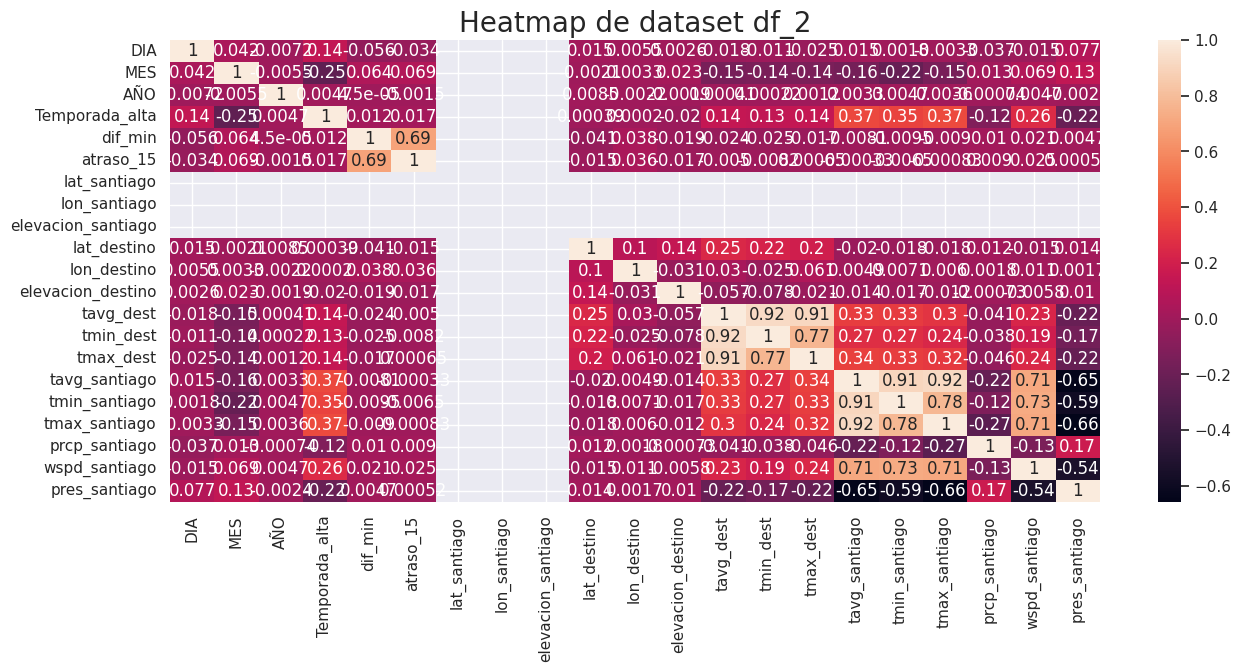

In [ ]:
#Hagamos un HeatMap del df_2
plt.rcParams['figure.figsize'] = (15, 6)

sns.heatmap(df_2.corr(), annot = True)
plt.title('Heatmap de dataset df_2', fontsize = 20)
plt.show()

#### Existe un correlación alta entre las variables "wspd_santiago" y "tmin_santiago"; "wspd_santiago" y "tmax_santiago"; "tmax_santiago" y "tmin_santiago"; tmax_dest" y "tmin_dest";

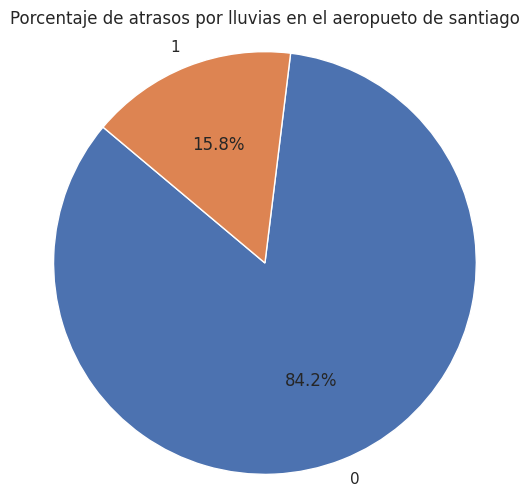

In [ ]:
# Filtrar el DataFrame para obtener solo las filas donde 'prcp_santiago' > 1
df_atrasos_lluvias = df_2[df_2['prcp_santiago'] > 1]

# Contar los valores de '1' y '0' en la columna 'atraso_15'
conteo_atrasos = df_atrasos_lluvias['atraso_15'].value_counts()

# Graficar los resultados en un gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(conteo_atrasos, labels=conteo_atrasos.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de atrasos por lluvias en el aeropueto de santiago')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Calcular la matriz de correlación de la variable "atraso_15"
correlaciones = df_2.corr()

# Obtener las correlaciones de la variable "atraso_15" con el resto de las variables
correlaciones_atraso = correlaciones['atraso_15']

# Mostrar las correlaciones
print(correlaciones_atraso)

DIA                  -0.034153
MES                   0.068537
AÑO                  -0.001493
Temporada_alta        0.017137
dif_min               0.694336
atraso_15             1.000000
lat_santiago               NaN
lon_santiago               NaN
elevacion_santiago         NaN
lat_destino          -0.015047
lon_destino           0.036307
elevacion_destino    -0.016833
tavg_dest            -0.004971
tmin_dest            -0.008189
tmax_dest             0.000654
tavg_santiago        -0.000327
tmin_santiago        -0.006479
tmax_santiago        -0.000831
prcp_santiago         0.008990
wspd_santiago         0.024846
pres_santiago         0.000518
Name: atraso_15, dtype: float64


<ipython-input-65-56e6a291725c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df_2.corr()


# Machine Learning

#### Se crean modelos de machine learning que pueda predecir los vuelos atrasados.

## Transformacón de base de datos para adaptarla a un modelo de cladificación

In [ ]:
# Lista de columnas a eliminar
columnas_a_eliminar_1 = ['Fecha-I', 'Vlo-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O', 'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'AÑO', 'dif_min', 'fecha_i',
                       'fecha_o', 'siglaori', 'siglades', 'lat_santiago', 'lon_santiago', 'elevacion_santiago', 'lat_destino', 'lon_destino',
                       'elevacion_destino', 'SIGLAORI', 'Ori-I']

# Crear df_3
df_3 = df_2.drop(columnas_a_eliminar_1, axis=1)

In [ ]:
print("Valores únicos columna OPERA:", df_3['OPERA'].unique())
print("Valores únicos columna SIGLADES:", df_3['SIGLADES'].unique())

Valores únicos columna OPERA: ['American Airlines' 'Grupo LATAM' 'Aerolineas Argentinas' 'Austral'
 'Air Canada' 'Qantas Airways' 'Sky Airline' 'Air France' 'Aeromexico'
 'Avianca' 'Alitalia' 'K.L.M.' 'British Airways' 'Copa Air' 'Delta Air'
 'Gol Trans' 'Iberia' 'United Airlines' 'Latin American Wings'
 'Plus Ultra Lineas Aereas' 'JetSmart SPA' 'Oceanair Linhas Aereas'
 'Lacsa']
Valores únicos columna SIGLADES: ['Miami' 'Iquique' 'Dallas' 'Buenos Aires' 'Lima' 'Puerto Montt' 'Sydney'
 'Temuco' 'Concepcion' 'Calama' 'Valdivia' 'Toronto' 'Antofagasta' 'Arica'
 'Paris' 'Ciudad de Mexico' 'Castro (Chiloe)' 'Punta Arenas' 'Sao Paulo'
 'Bogota' 'Montevideo' 'Guayaquil' 'Roma' 'Londres' 'Copiapo'
 'Ciudad de Panama' 'Atlanta' 'Nueva York' 'Rio de Janeiro'
 'Florianapolis' 'Madrid' 'Balmaceda' 'La Serena' 'Houston' 'Asuncion'
 'Mendoza' 'Puerto Natales' 'Cordoba' 'La Paz' 'Punta Cana' 'Osorno'
 'Isla de Pascua' 'Los Angeles' 'Orlando' 'Cancun' 'Auckland N.Z.'
 'Santa Cruz' 'Curitiba, Bra.' 'Q

In [ ]:
# Crear un diccionario con los mapeos de reemplazo para cada dato único
reemplazos_2 = {valor: i for i, valor in enumerate(df_3['DIANOM'].unique())}

# Aplicar el reemplazo a la columna 'DIANOM'
df_3['DIANOM'] = df_3['DIANOM'].replace(reemplazos_2)

In [ ]:
print(reemplazos_2)

{'Domingo': 0, 'Martes': 1, 'Sabado': 2, 'Jueves': 3, 'Lunes': 4, 'Miercoles': 5, 'Viernes': 6}


In [ ]:
# Crear un diccionario con los mapeos de reemplazo para cada dato único
reemplazos_3 = {valor: i for i, valor in enumerate(df_3['TIPOVUELO'].unique())}

# Aplicar el reemplazo a la columna 'TIPOVUELO'
df_3['TIPOVUELO'] = df_3['TIPOVUELO'].replace(reemplazos_3)

In [ ]:
print(reemplazos_3)

{'I': 0, 'N': 1}


In [ ]:
# Crear un diccionario con los mapeos de reemplazo para cada dato único
reemplazos_4 = {valor: i for i, valor in enumerate(df_3['periodo_dia'].unique())}

# Aplicar el reemplazo a la columna 'periodo_dia'
df_3['periodo_dia'] = df_3['periodo_dia'].replace(reemplazos_4)

In [ ]:
print(reemplazos_4)

{'noche': 0, 'tarde': 1, 'mañana': 2}


In [ ]:
# Crear un diccionario con los mapeos de reemplazo para cada dato único
reemplazos = {valor: i for i, valor in enumerate(df_3['SIGLADES'].unique())}

# Aplicar el reemplazo a la columna 'SIGLADES'
df_3['SIGLADES'] = df_3['SIGLADES'].replace(reemplazos)

In [ ]:
print(reemplazos)

{'Miami': 0, 'Iquique': 1, 'Dallas': 2, 'Buenos Aires': 3, 'Lima': 4, 'Puerto Montt': 5, 'Sydney': 6, 'Temuco': 7, 'Concepcion': 8, 'Calama': 9, 'Valdivia': 10, 'Toronto': 11, 'Antofagasta': 12, 'Arica': 13, 'Paris': 14, 'Ciudad de Mexico': 15, 'Castro (Chiloe)': 16, 'Punta Arenas': 17, 'Sao Paulo': 18, 'Bogota': 19, 'Montevideo': 20, 'Guayaquil': 21, 'Roma': 22, 'Londres': 23, 'Copiapo': 24, 'Ciudad de Panama': 25, 'Atlanta': 26, 'Nueva York': 27, 'Rio de Janeiro': 28, 'Florianapolis': 29, 'Madrid': 30, 'Balmaceda': 31, 'La Serena': 32, 'Houston': 33, 'Asuncion': 34, 'Mendoza': 35, 'Puerto Natales': 36, 'Cordoba': 37, 'La Paz': 38, 'Punta Cana': 39, 'Osorno': 40, 'Isla de Pascua': 41, 'Los Angeles': 42, 'Orlando': 43, 'Cancun': 44, 'Auckland N.Z.': 45, 'Santa Cruz': 46, 'Curitiba, Bra.': 47, 'Quito': 48, 'Bariloche': 49, 'Rosario': 50, 'Washington': 51, 'San Juan, Arg.': 52, 'Melbourne': 53, 'Tucuman': 54, 'Neuquen': 55, 'Pisco, Peru': 56, 'Ushuia': 57, 'Punta del Este': 58, 'Catarata

In [ ]:
# Crear un diccionario con los mapeos de reemplazo para cada dato único
reemplazos_1 = {valor: i for i, valor in enumerate(df_3['OPERA'].unique())}

# Aplicar el reemplazo a la columna 'OPERA'
df_3['OPERA'] = df_3['OPERA'].replace(reemplazos_1)

In [ ]:
print(reemplazos_1)

{'American Airlines': 0, 'Grupo LATAM': 1, 'Aerolineas Argentinas': 2, 'Austral': 3, 'Air Canada': 4, 'Qantas Airways': 5, 'Sky Airline': 6, 'Air France': 7, 'Aeromexico': 8, 'Avianca': 9, 'Alitalia': 10, 'K.L.M.': 11, 'British Airways': 12, 'Copa Air': 13, 'Delta Air': 14, 'Gol Trans': 15, 'Iberia': 16, 'United Airlines': 17, 'Latin American Wings': 18, 'Plus Ultra Lineas Aereas': 19, 'JetSmart SPA': 20, 'Oceanair Linhas Aereas': 21, 'Lacsa': 22}


In [ ]:
# Obtener el resumen estadístico de las columnas
resumen_estadistico = df_3[['tavg_dest', 'tmin_dest', 'tmax_dest',
                          'tavg_santiago', 'tmin_santiago', 'tmax_santiago',
                          'prcp_santiago', 'wspd_santiago', 'pres_santiago']].describe()

# Seleccionar solo las filas de 'min' y 'max' del resumen estadístico
min_max_valores = resumen_estadistico.loc[['min', 'max']]

# Mostrar el resultado
print(min_max_valores)

     tavg_dest  tmin_dest  tmax_dest  tavg_santiago  tmin_santiago  \
min      -10.1      -20.8       -7.3            3.5           -3.8   
max       32.8       28.9       41.9           27.5           19.5   

     tmax_santiago  prcp_santiago  wspd_santiago  pres_santiago  
min            9.0            0.0            3.9         1009.9  
max           37.7           20.8           17.8         1028.5  


In [ ]:
# Reemplazar rango de valores columna 'wspd_santiago', si la velocidad del viento pone en riesgo operación del vuelo 1 y si no la pone en riesgo 0

df_3['wspd_santiago'] = np.where(df_3['wspd_santiago'] >= 63, 1, 0)

In [ ]:
# Reemplazar rango de valores columna 'pres_santiago', si la presión atsmosférica pone en riesgo operación del vuelo 1 y si no la pone en riesgo 0

df_3['pres_santiago'] = np.where(df_3['pres_santiago'] <= 980, 1, 0)

In [ ]:
# Reemplazar valores en columna 'tavg_dest', si la temperatura pone en riesgo operación del vuelo 1 y si no la pone en riesgo 0

def reemplazar_valor(valor):
    if valor >= 0 and valor <= 30:
        return 0
    elif valor < 0 or valor > 30:
        return 1

# Aplicar la función a la columna 'tavg_dest'
df_3['tavg_dest'] = df_3['tavg_dest'].apply(lambda x: reemplazar_valor(x))

In [ ]:
# Reemplazar valores en columna 'tmin_dest', si la temperatura pone en riesgo operación del vuelo 1 y si no la pone en riesgo 0

def reemplazar_valor_1(valor_1):
    if valor_1 >= 0 and valor_1 <= 30:
        return 0
    elif valor_1 < 0 or valor_1 > 30:
        return 1

# Aplicar la función a la columna 'tmin_dest'
df_3['tmin_dest'] = df_3['tmin_dest'].apply(lambda x: reemplazar_valor_1(x))

In [ ]:
# Reemplazar valores en columna 'tmax_dest', si la temperatura pone en riesgo operación del vuelo 1 y si no la pone en riesgo 0

def reemplazar_valor_2(valor_2):
    if valor_2 >= 0 and valor_2 <= 30:
        return 0
    elif valor_2 < 0 or valor_2 > 30:
        return 1

# Aplicar la función a la columna 'tmax_dest'
df_3['tmax_dest'] = df_3['tmax_dest'].apply(lambda x: reemplazar_valor_2(x))

In [ ]:
# Reemplazar valores en columna 'tavg_santiago', si la temperatura pone en riesgo operación del vuelo 1 y si no la pone en riesgo 0

def reemplazar_valor_3(valor_3):
    if valor_3 >= 0 and valor_3 <= 30:
        return 0
    elif valor_3 < 0 or valor_3 > 30:
        return 1

# Aplicar la función a la columna 'tmax_dest'
df_3['tavg_santiago'] = df_3['tavg_santiago'].apply(lambda x: reemplazar_valor_3(x))

In [ ]:
# Reemplazar valores en columna 'tmin_santiago', si la temperatura pone en riesgo operación del vuelo 1 y si no la pone en riesgo 0

def reemplazar_valor_4(valor_4):
    if valor_4 >= 0 and valor_4 <= 30:
        return 0
    elif valor_4 < 0 or valor_4 > 30:
        return 1

# Aplicar la función a la columna 'tmax_dest'
df_3['tmin_santiago'] = df_3['tmin_santiago'].apply(lambda x: reemplazar_valor_4(x))

In [ ]:
# Reemplazar valores en columna 'tmax_santiago', si la temperatura pone en riesgo operación del vuelo 1 y si no la pone en riesgo 0

def reemplazar_valor_5(valor_5):
    if valor_5 >= 0 and valor_5 <= 30:
        return 0
    elif valor_5 < 0 or valor_5 > 30:
        return 1

# Aplicar la función a la columna 'tmax_dest'
df_3['tmax_santiago'] = df_3['tmax_santiago'].apply(lambda x: reemplazar_valor_5(x))

In [ ]:
# Reemplazar valores en columna 'tmax_santiago', si el nivel de lluvia no pone en riesgo la operación del vuelo:0; riesgo moderado:1, riesgo alto:2
rangos = [-np.inf, 2.5, 7.6, np.inf]
etiquetas = [0, 1, 2]

# Aplicar la función pd.cut() para asignar las etiquetas según los rangos
df_3['prcp_santiago'] = pd.cut(df_3['prcp_santiago'], bins=rangos, labels=etiquetas, right=False)

In [ ]:
df_3.head()

,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,Temporada_alta,atraso_15,periodo_dia,tavg_dest,tmin_dest,tmax_dest,tavg_santiago,tmin_santiago,tmax_santiago,prcp_santiago,wspd_santiago,pres_santiago
0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,1,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


# Árbol de decisión

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

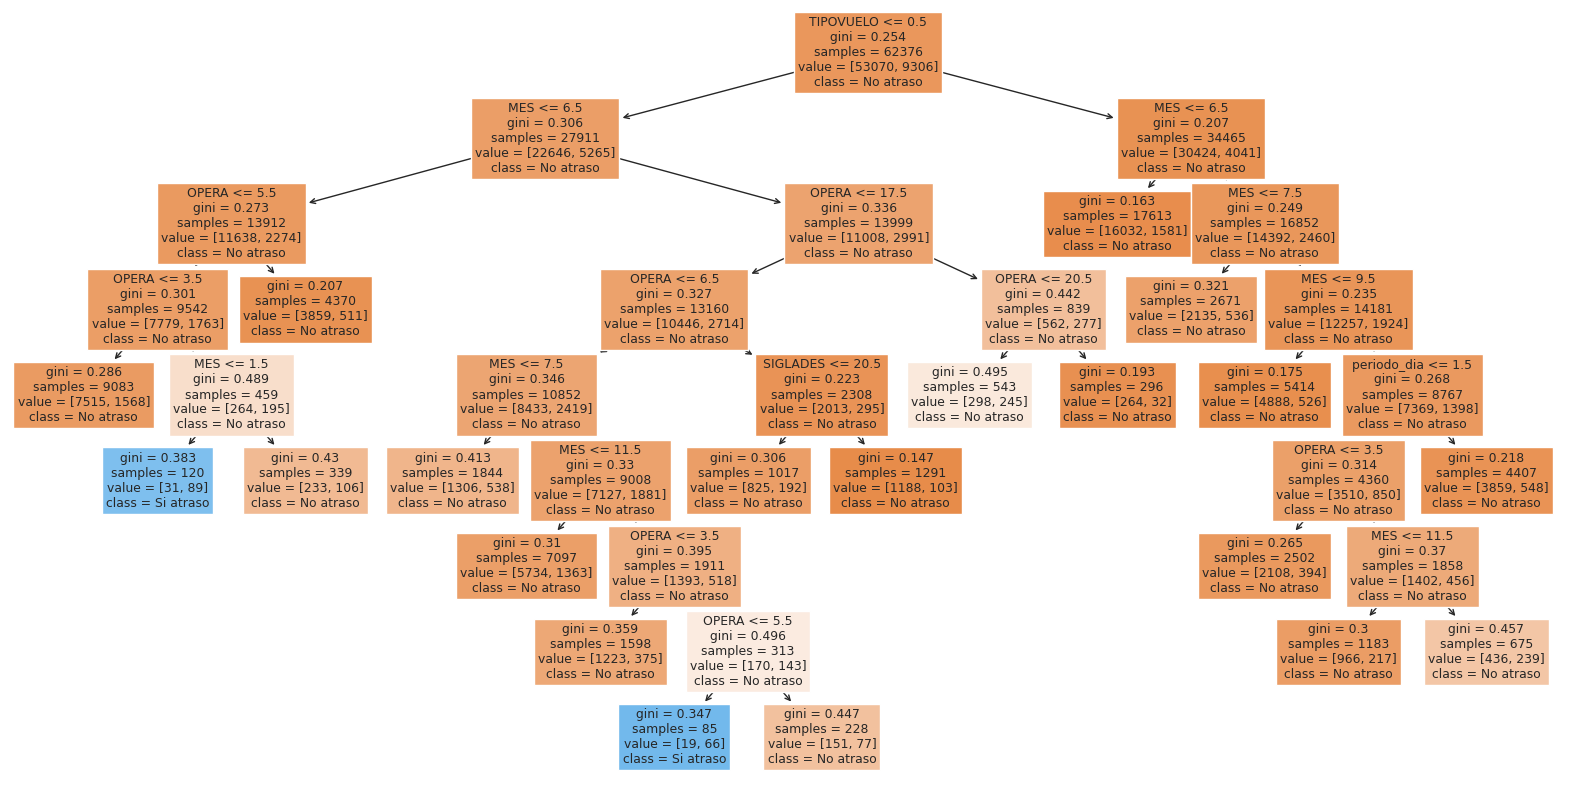

Rendimiento del árbol de decisión con 20 nodos: 0.86


In [ ]:
#Paso 1: Dividimos el dataset en entrenamiento y prueba.

X = df_3.drop('atraso_15', axis=1)

y = df_3['atraso_15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Paso 2 = Crear el árbol de decisión con nodos con 20
model = DecisionTreeClassifier(max_leaf_nodes= 20)

#Paso 3 = Ajuste del modelo
model.fit(X_train, y_train)

#Paso 4: Visualizar árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No atraso', 'Si atraso'], filled=True)
plt.show()

#Paso 5: Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#Paso 6: Evaluar el rendimiento del árbol de decisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del árbol de decisión con 20 nodos: {accuracy:.2f}')

#### La interpretación del árbol de decisión es la siguiente: Si el vuelo es internacional (V) ('TIPOVUELO'<=0.5 porque internacional está categorizado como 0) hay que mirar los meses de enero a junio (V) ('MES'<=6.5 porque los meses van de 1 hasta 12); luego hay que mirar si lo opera una de las aerolíneas categorizadas de 0 a 5 (V) ('OPERA'<= 5.5 es decir las aerolíneas 'American Airlines': 0, 'Grupo LATAM': 1, 'Aerolineas Argentinas': 2, 'Austral': 3, 'Air Canada': 4, 'Qantas Airways': 5); luego hay que mirar si el vuelo lo operan las aerolíneas NO categorizadas de 1 a 3 (F) ('OPERA'<=3.5 'Air Canada': 4, 'Qantas Airways': 5, 'Sky Airline': 6, 'Air France': 7, 'Aeromexico': 8, 'Avianca': 9, 'Alitalia': 10, 'K.L.M.': 11, 'British Airways': 12, 'Copa Air': 13, 'Delta Air': 14, 'Gol Trans': 15, 'Iberia': 16, 'United Airlines': 17, 'Latin American Wings': 18, 'Plus Ultra Lineas Aereas': 19, 'JetSmart SPA': 20, 'Oceanair Linhas Aereas': 21, 'Lacsa': 22); luego hay que mirar si se opera el vuelo en el mes de enero ('MES'<=1.5) y si es así hay una alta probabilidad de atraso.

#### También el árbol de decisión muestra que si el vuelo es internacional (V) ('TIPOVUELO'<=0.5 porque internacional está categorizado como 0); hay que mirar los meses de julio a diciembre (F) ('MES'<=6.5 porque los meses van de 1 hasta 12); luego si EL VUELO lo opera las aerolíneas categorizadas desde 0 hasta 17 (V) ('OPERA'<= 'American Airlines': 0, 'Grupo LATAM': 1, 'Aerolineas Argentinas': 2, 'Austral': 3, 'Air Canada': 4, 'Qantas Airways': 5, 'Sky Airline': 6, 'Air France': 7, 'Aeromexico': 8, 'Avianca': 9, 'Alitalia': 10, 'K.L.M.': 11, 'British Airways': 12, 'Copa Air': 13, 'Delta Air': 14, 'Gol Trans': 15, 'Iberia': 16, 'United Airlines': 17); luego si  el vuelo los opera las aerolíneas categorizadas desde 0 hasta 6 (V) (MES'<=6.5 porque los meses van de 1 hasta 12); luego si los opera las aerolíneas categorizadas desde 0 hasta 17 (V) ('OPERA'<= 'American Airlines': 0, 'Grupo LATAM': 1, 'Aerolineas Argentinas': 2, 'Austral': 3, 'Air Canada': 4, 'Qantas Airways': 5, 'Sky Airline': 6); luego si el vuelo está programado entre los meses de agosto y diciembre (F) ('MES'<=7.5); luego si el vuelo esta programado para el mes de diciembre (F) ('MES' <= 11.5); luego si el vuelo opera en las aerolíneas categorizadas a paritr de 4 (F) ('Air Canada': 4, 'Qantas Airways': 5, 'Sky Airline': 6, 'Air France': 7, 'Aeromexico': 8, 'Avianca': 9, 'Alitalia': 10, 'K.L.M.': 11, 'British Airways': 12, 'Copa Air': 13, 'Delta Air': 14, 'Gol Trans': 15, 'Iberia': 16, 'United Airlines': 17, 'Latin American Wings': 18, 'Plus Ultra Lineas Aereas': 19, 'JetSmart SPA': 20, 'Oceanair Linhas Aereas': 21, 'Lacsa': 22); luego si el vuelo lo operan las aerolíneas categorizadas de 0 a 5 (V) ('American Airlines': 0, 'Grupo LATAM': 1, 'Aerolineas Argentinas': 2, 'Austral': 3, 'Air Canada': 4, 'Qantas Airways': 5) hay una alta probabilidad que el vuelo se atrase

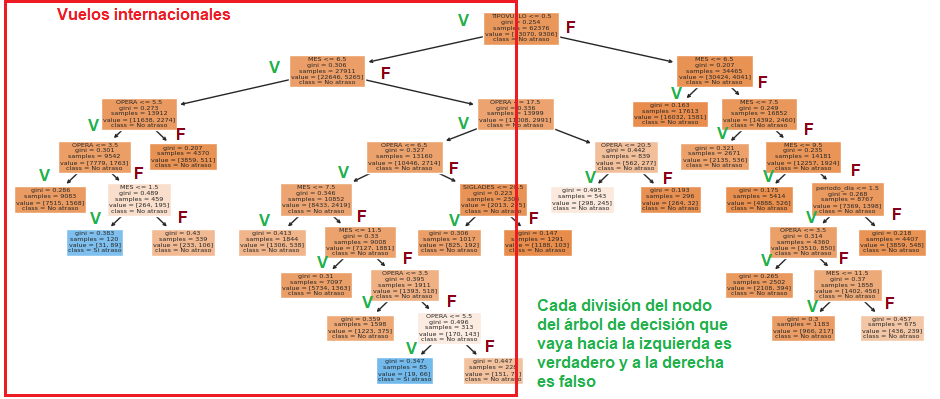


#Clasificación: K-Nearest-Neighbor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
#Paso 1: Defininir columnas variables y variable objetivo (Y)

X = df_3.drop('atraso_15', axis=1)

y = df_3['atraso_15']

#Paso 2: Vamos a dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Paso 3 :Escalar los datos para normalizarlos, estandarizarlos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Paso 4: Crear el modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

#Paso 5: Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train_scaled, y_train) #Con x datos normalizados

#Paso 6: Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

# Paso 7: Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del modelo K-Nearest Neighbors: {accuracy:.2f}')

Rendimiento del modelo K-Nearest Neighbors: 0.84


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

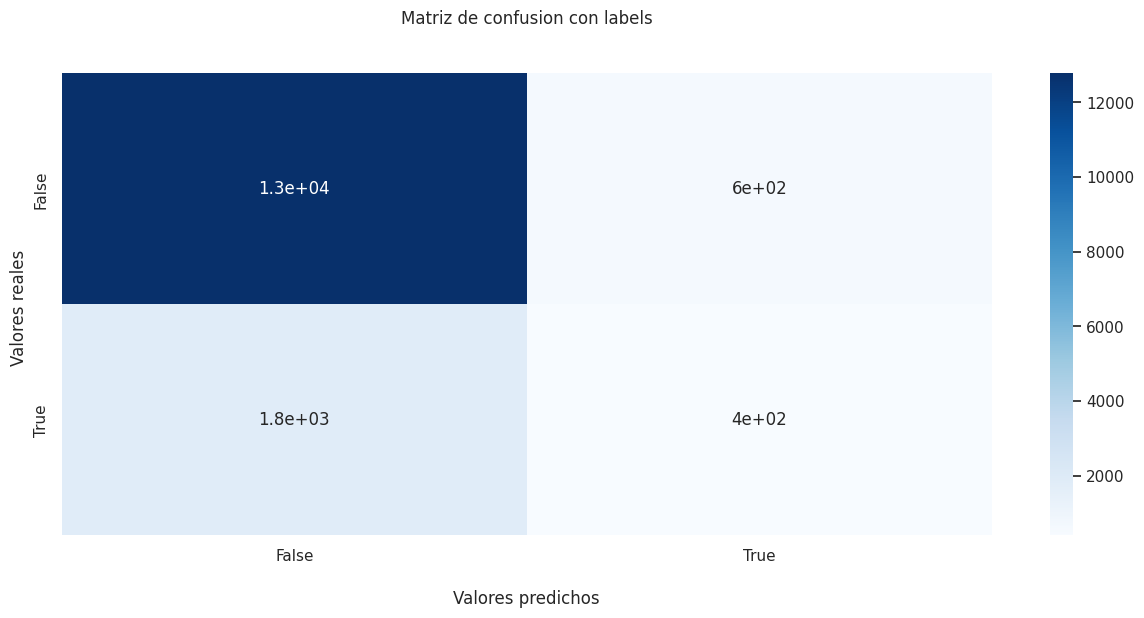

Matriz de Confusión:
[[12766   596]
 [ 1833   400]]


In [ ]:
#Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

#Visualización de la matriz
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
print('Matriz de Confusión:')
print(cm)

In [ ]:
# Imprimir informe de clasificación las métricas de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     13362
           1       0.40      0.18      0.25      2233

    accuracy                           0.84     15595
   macro avg       0.64      0.57      0.58     15595
weighted avg       0.81      0.84      0.82     15595



#### Los resultados se interpretan de la siguiente manera:
* (Verdadero Verdadero): El modelo ha predicho 400 vuelos atrasados correctamente.
*(Verdadero Falso): El modelo ha predicho 596 vuelos como atrasados cuando realmente estaban a tiempo
*(Falso Verdadero): El modelo ha predicho 1833 vuelos como a tiempo cuando en realidad estaban atrasados
*(Falso Falso): El modelo ha predicho correctamnete 12766 vuelos como a tiempo

#### El rendimiento del modelo se interpreta así:
* Accuracy se calcula como el número de verdaderos positivos dividido por el número total de verdaderos positivos y falsos positivos.
* Precision es número de verdaderos positivos dividido por el número total de verdaderos positivos y falsos positivos
* f1-score es la precisión del modelo
* recall es la sensibilidad del modelo


# Regresión logística

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
#Paso 1: definir variables
X = df_3.drop('atraso_15', axis=1)
y = df_3['atraso_15']

#Paso 2: Dividir conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Paso 3: Modelo regresión de regresión logística
logistic_model = LogisticRegression()

#Paso 4:  Entrenar el modelo con los datos de entrenamiento
logistic_model.fit(X_train_scaled, y_train)

# Paso 5: Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test_scaled)

#Paso 6: Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del modelo de Regresión Logística: {accuracy:.2f}')

Rendimiento del modelo de Regresión Logística: 0.86


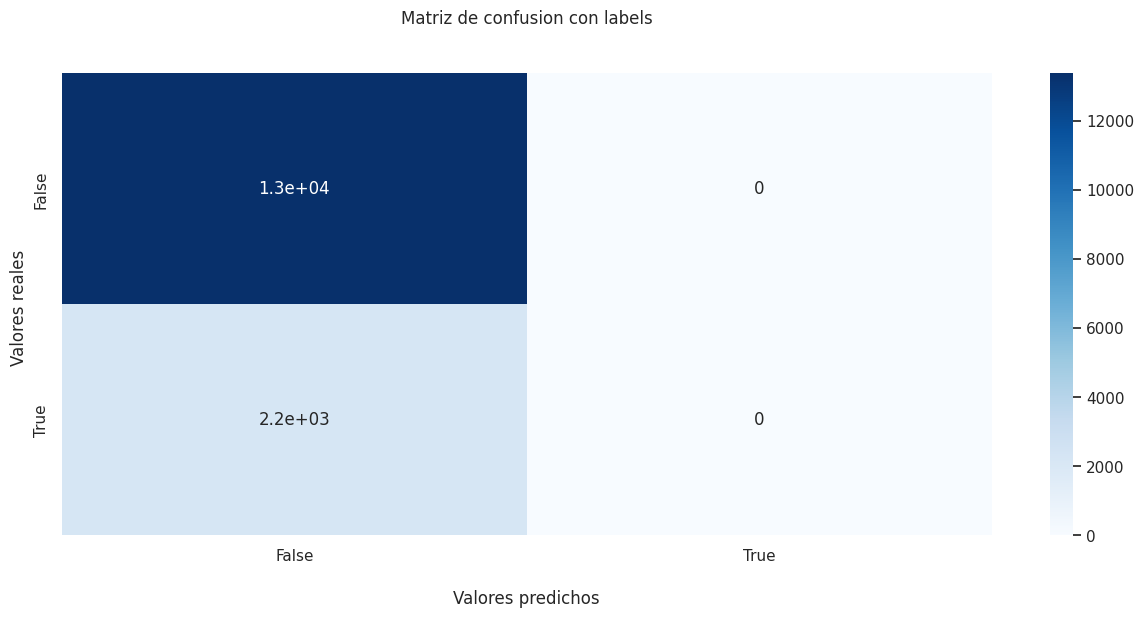

Matriz de Confusión:
[[13362     0]
 [ 2233     0]]


In [ ]:
#Visualizar en matriz de confusión

cm = confusion_matrix(y_test, y_pred)

#Matriz de confusion
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
print('Matriz de Confusión:')
print(cm)

#### El modelo de regresión logística no es útil para el dataset analizado porque no arroja resultados en los cuadrantes Verdadero Verdadero (predicción de vuelos realmente atrasados) y Verdadero Falso (predicción de vuelos atrasados que fueron a tiempo realmente)

## Aplicando método de reducción de dimensionalidad PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [ ]:
# Paso 1: Definir variables
X = df_3.drop('atraso_15', axis=1)
y = df_3['atraso_15']

# Paso 2: Dividir conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 4: Aplicar PCA
pca = PCA(n_components=8)  # Especifica el número de componentes deseados
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Paso 5: Entrenar el modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train_pca, y_train)

# Paso 6: Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test_pca)

# Paso 7: Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del modelo de Regresión Logística después de PCA: {accuracy:.2f}')

Rendimiento del modelo de Regresión Logística después de PCA: 0.86


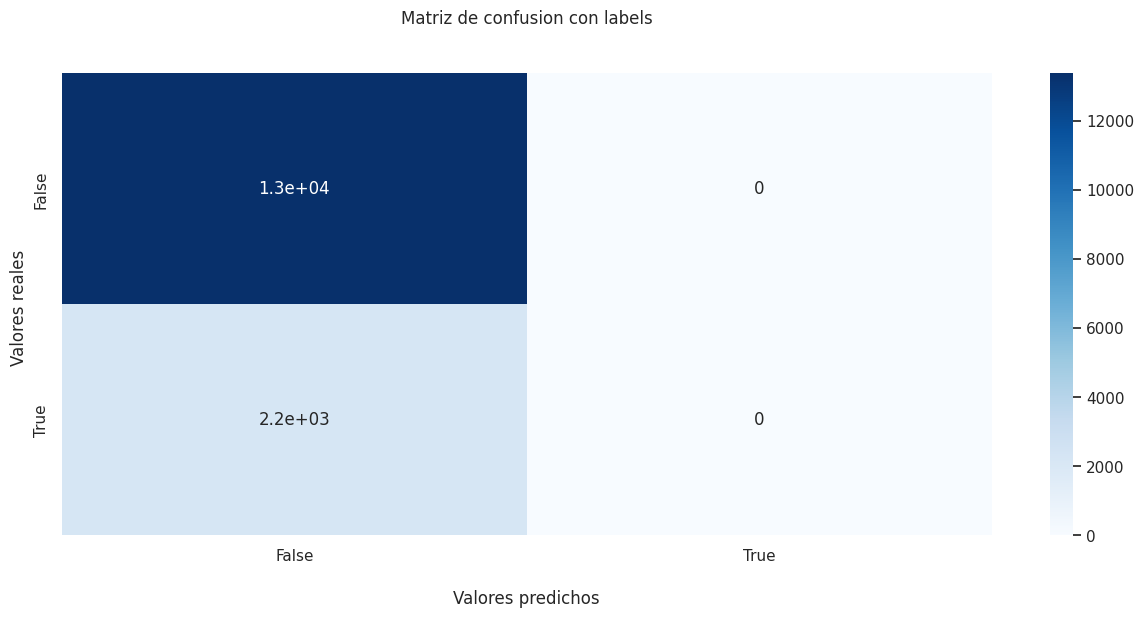

Matriz de Confusión:
[[13362     0]
 [ 2233     0]]


In [ ]:
#Visualizar en matriz de confusión

cm = confusion_matrix(y_test, y_pred)

#Matriz de confusion
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
print('Matriz de Confusión:')
print(cm)

#### Aplicando el método de reducción de dimensionalidad al modelo de regresión logística no obtenemos niguna mejora del modelo

# Conclusión

#### Los datos originales de df + df_1 (los datos del clima del aeropuero de santiago de chile) al ser unidos en df_2 para luego ser tranformadas las variables categoricas en números lo cual genera df_3 arrojan suficientes datos como para crear un modelo que permita predecir el atraso de los vuelos con el modelo de machine learning de Árbol de Decisión el cual permite visualizar diferentes situaciones las cuales pueden llevar a una alta probabilidad de un atraso en un vuelo y este modelo acompañado del modelo de machine learning K-Nearest-Neighbor permite visualizar que tan preciso son las predicciones según la categorización que se hizo a las variables del dataset df_3